# Lesson 1: MNIST Classification using Fully Connected Neural Networks

## Introduction

MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits. The dataset also includes labels for each image, telling us which digit it is (0, 1, 2, ..., 9).

In this notebook, we will use the MNIST dataset to train a simple neural network to classify the images. We will use the PyTorch library to build a simple fully connected neural network and train it on the dataset.

The notebook is divided into the following sections:
1. Importing the libraries
2. Loading the dataset
3. Preparing the dataset
4. Building the neural network
5. Training the model
6. Evaluating the model
7. Reloading the model and making predictions

Throughout the notebook, you will see '#TODO' comments. These are placeholders for you to write your own code. You should write the code to complete the functionality of the neural network.

## Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

## Hyperparameters

In [2]:
# Determine if a GPU is available, and use it if so
# we will use it to train our model, if not we will use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_size = 784  # MNIST data is 28x28 pixels
hidden_size = 500  # number of nodes in the hidden layer
num_classes = 10  # number of output classes (0-9)
num_epochs = 5  # number of times we will loop through the entire dataset
batch_size = 100  # number of images to process at once
learning_rate = 0.001  # how much we update our weights each iteration

## MNIST

### Load MNIST

The first step is to load the MNIST dataset. We will use the `tensorflow_datasets` library to load the dataset.

In [4]:
# create datasets folder
os.makedirs("../datasets", exist_ok=True)
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="../datasets", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="../datasets", train=False, transform=transforms.ToTensor()
)

After downloading the dataset, we will use torch dataloaders to load the data.
Dataloader is a utility that helps us to load the data in batches and also shuffle the data.

In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

### Visualize MNIST

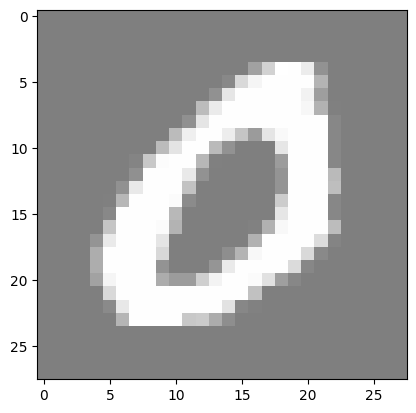

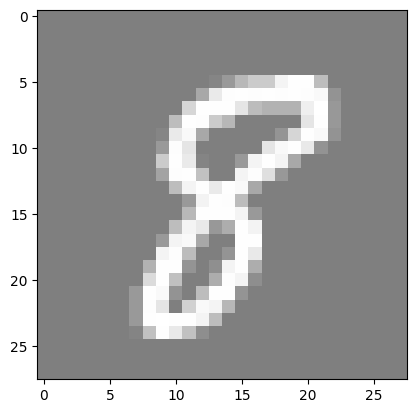

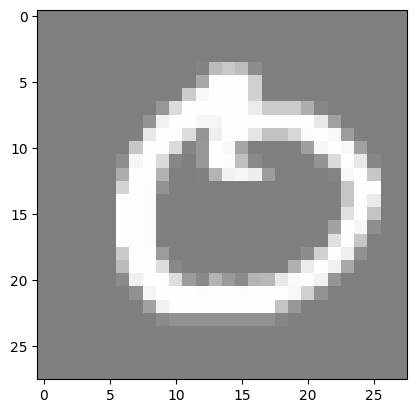

In [6]:
## Visualize MNIST
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


for _ in range(3):
    image, _ = train_dataset[np.random.randint(0, len(train_dataset))]
    imshow(torchvision.utils.make_grid(image))

## Data Augmentation

In [7]:
# TODO:
# Watch this very short (it's literally a YouTube Short) video about data augmentation: https://www.youtube.com/shorts/S-7LpWzUaOg
# Read about data augmentation for images in PyTorch: https://www.kaggle.com/code/mohamedmustafa/7-data-augmentation-on-images-using-pytorch
# Add data augmentation to the MNIST dataset

## Neural Network

In [8]:
class Net(nn.Module):  # inherit from nn.Module
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()  # call the constructor of the parent class

        self.fc1 = nn.Linear(input_size, hidden_size)  # first fully connected layer
        self.relu = nn.ReLU()  # activation function

        # TODO:
        # 1. Add a second fully connected layer (don't forget to add an activation function).
        # 2. (Optional) Experiment with different activation functions,
        # such as sigmoid, tanh, leaky relu and parametric relu.

        self.fc2 = nn.Linear(hidden_size, num_classes)  # second fully connected layer

        # softmax is used for multi-class classification problems
        # it converts the output to a probability distribution over the classes
        # the class with the highest probability is the predicted class
        # logsoftmax is used to improve numerical stability
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        :param x: input tensor (batch_size, input_size)
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.logsoftmax(x)

        return x

$$
[LogSoftmax(x)]_i = \log\left(\frac{\exp(x_i)}{\sum_j \exp(x_j)}\right)    
$$

## Initialization

In [9]:
# create the model and move it to the GPU if available
model = Net(input_size, hidden_size, num_classes).to(device)

In [10]:
# loss function
# we usually use cross-entropy loss for classification problems
# it applies log softmax to the output and then applies negative log likelihood loss
# in our model, we apply logsoftmax in the forward method, so we don't
# the loss function to do it.
# Thence, instead of using nn.CrossEntropyLoss, we use nn.NLLLoss

# simply,
# * If we apply logsoftmax in the forward method, we use nn.NLLLoss
# * If we don't apply logsoftmax in the forward method, we use nn.CrossEntropyLoss


criterion = nn.NLLLoss()  # negative log likelihood loss

# optimizer
# we use the Adam optimizer, it is a popular optimizer
# it is an extension to stochastic gradient descent
# it computes adaptive learning rates for each parameter
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training the Model

In [11]:
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    # Initialize progress bar
    progress_bar = tqdm(enumerate(train_loader), total=total_step, leave=True)

    for i, (images, labels) in progress_bar:
        # Move tensors to the configured device
        images = images.reshape(-1, 28 * 28).to(device)  # flatten the images
        # flatten the images to be (batch_size, 28*28)
        # this is important because FCNNs take a 1D tensor as input

        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update progress bar description
        progress_bar.set_description(
            f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}"
        )

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [1/600], Loss: 2.3071:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [2/600], Loss: 2.1950:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [3/600], Loss: 2.1342:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [4/600], Loss: 2.0096:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [5/600], Loss: 1.9546:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [6/600], Loss: 1.8135:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [7/600], Loss: 1.7493:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [8/600], Loss: 1.6947:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [9/600], Loss: 1.5325:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [10/600], Loss: 1.4435:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [11/600], Loss: 1.4473:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [12/600], Loss: 1.1977:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [13/600], Loss: 1.2178:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [14/600], Loss: 1.1412:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [1/5], Step [14/600], Loss: 1.1412:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [15/600], Loss: 1.0942:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [16/600], Loss: 0.9846:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [17/600], Loss: 1.0420:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [18/600], Loss: 0.7995:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [19/600], Loss: 0.8319:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [20/600], Loss: 0.9382:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [21/600], Loss: 0.8069:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [22/600], Loss: 0.8153:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [23/600], Loss: 0.7817:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [24/600], Loss: 0.6299:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [25/600], Loss: 0.6289:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [26/600], Loss: 0.7588:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [27/600], Loss: 0.7771:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [28/600], Loss: 0.6148:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [29/600], Loss: 0.6114:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [30/600], Loss: 0.5518:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [31/600], Loss: 0.6493:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [32/600], Loss: 0.5580:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [33/600], Loss: 0.4858:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [34/600], Loss: 0.4856:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [35/600], Loss: 0.3993:   2%|██▏                                                                                            | 14/600 [00:00<00:04, 137.76it/s]

Epoch [1/5], Step [35/600], Loss: 0.3993:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [36/600], Loss: 0.4224:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [37/600], Loss: 0.3807:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [38/600], Loss: 0.4790:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [39/600], Loss: 0.3428:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [40/600], Loss: 0.4333:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [41/600], Loss: 0.5435:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [42/600], Loss: 0.4393:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [43/600], Loss: 0.4375:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [44/600], Loss: 0.3683:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [45/600], Loss: 0.4626:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [46/600], Loss: 0.4039:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [47/600], Loss: 0.3945:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [48/600], Loss: 0.3946:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [49/600], Loss: 0.4046:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [50/600], Loss: 0.3829:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [51/600], Loss: 0.5988:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [52/600], Loss: 0.5180:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [53/600], Loss: 0.4604:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [54/600], Loss: 0.4611:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [55/600], Loss: 0.4870:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [56/600], Loss: 0.3893:   6%|█████▌                                                                                         | 35/600 [00:00<00:03, 178.58it/s]

Epoch [1/5], Step [56/600], Loss: 0.3893:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [57/600], Loss: 0.3238:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [58/600], Loss: 0.4088:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [59/600], Loss: 0.3862:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [60/600], Loss: 0.4459:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [61/600], Loss: 0.3691:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [62/600], Loss: 0.3652:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [63/600], Loss: 0.4375:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [64/600], Loss: 0.2433:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [65/600], Loss: 0.6153:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [66/600], Loss: 0.3942:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [67/600], Loss: 0.3039:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [68/600], Loss: 0.3526:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [69/600], Loss: 0.6083:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [70/600], Loss: 0.3935:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [71/600], Loss: 0.3647:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [72/600], Loss: 0.5645:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [73/600], Loss: 0.4126:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [74/600], Loss: 0.2310:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [75/600], Loss: 0.3828:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [76/600], Loss: 0.4059:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [77/600], Loss: 0.4065:   9%|████████▊                                                                                      | 56/600 [00:00<00:02, 190.64it/s]

Epoch [1/5], Step [77/600], Loss: 0.4065:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [78/600], Loss: 0.4385:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [79/600], Loss: 0.3984:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [80/600], Loss: 0.4322:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [81/600], Loss: 0.4270:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [82/600], Loss: 0.2912:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [83/600], Loss: 0.2737:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [84/600], Loss: 0.4982:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [85/600], Loss: 0.3217:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [86/600], Loss: 0.3498:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [87/600], Loss: 0.3745:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [88/600], Loss: 0.4516:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [89/600], Loss: 0.4126:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [90/600], Loss: 0.3123:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [91/600], Loss: 0.3386:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [92/600], Loss: 0.4141:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [93/600], Loss: 0.2557:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [94/600], Loss: 0.3352:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [95/600], Loss: 0.3412:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [96/600], Loss: 0.4090:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [97/600], Loss: 0.2879:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [98/600], Loss: 0.2555:  13%|████████████▏                                                                                  | 77/600 [00:00<00:02, 195.99it/s]

Epoch [1/5], Step [98/600], Loss: 0.2555:  16%|███████████████▌                                                                               | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [99/600], Loss: 0.5109:  16%|███████████████▌                                                                               | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [100/600], Loss: 0.3991:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [101/600], Loss: 0.2734:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [102/600], Loss: 0.3701:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [103/600], Loss: 0.4635:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [104/600], Loss: 0.2921:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [105/600], Loss: 0.2411:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [106/600], Loss: 0.2533:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [107/600], Loss: 0.3045:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [108/600], Loss: 0.3278:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [109/600], Loss: 0.2519:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [110/600], Loss: 0.3726:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [111/600], Loss: 0.3800:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [112/600], Loss: 0.3953:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [113/600], Loss: 0.5365:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [114/600], Loss: 0.2717:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [115/600], Loss: 0.3946:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [116/600], Loss: 0.3384:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [117/600], Loss: 0.2380:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [118/600], Loss: 0.2874:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [119/600], Loss: 0.2321:  16%|███████████████▎                                                                              | 98/600 [00:00<00:02, 200.15it/s]

Epoch [1/5], Step [119/600], Loss: 0.2321:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [120/600], Loss: 0.2874:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [121/600], Loss: 0.2468:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [122/600], Loss: 0.2902:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [123/600], Loss: 0.1562:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [124/600], Loss: 0.4608:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [125/600], Loss: 0.3408:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [126/600], Loss: 0.3912:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [127/600], Loss: 0.4203:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [128/600], Loss: 0.3271:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [129/600], Loss: 0.2364:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [130/600], Loss: 0.3240:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [131/600], Loss: 0.2871:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [132/600], Loss: 0.3156:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [133/600], Loss: 0.2690:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [134/600], Loss: 0.1941:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [135/600], Loss: 0.2596:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [136/600], Loss: 0.3600:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [137/600], Loss: 0.1933:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [138/600], Loss: 0.3101:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [139/600], Loss: 0.2198:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [140/600], Loss: 0.3231:  20%|██████████████████▍                                                                          | 119/600 [00:00<00:02, 203.14it/s]

Epoch [1/5], Step [140/600], Loss: 0.3231:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [141/600], Loss: 0.1873:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [142/600], Loss: 0.2125:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [143/600], Loss: 0.4635:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [144/600], Loss: 0.2899:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [145/600], Loss: 0.3978:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [146/600], Loss: 0.2965:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [147/600], Loss: 0.2343:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [148/600], Loss: 0.3452:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [149/600], Loss: 0.2450:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [150/600], Loss: 0.3247:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [151/600], Loss: 0.3619:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [152/600], Loss: 0.3259:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [153/600], Loss: 0.2565:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [154/600], Loss: 0.4674:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [155/600], Loss: 0.2035:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [156/600], Loss: 0.2899:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [157/600], Loss: 0.2416:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [158/600], Loss: 0.3017:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [159/600], Loss: 0.2658:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [160/600], Loss: 0.3630:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [161/600], Loss: 0.3283:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [162/600], Loss: 0.2917:  23%|█████████████████████▋                                                                       | 140/600 [00:00<00:02, 204.35it/s]

Epoch [1/5], Step [162/600], Loss: 0.2917:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [163/600], Loss: 0.2218:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [164/600], Loss: 0.3301:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [165/600], Loss: 0.2564:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [166/600], Loss: 0.2459:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [167/600], Loss: 0.2943:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [168/600], Loss: 0.3692:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [169/600], Loss: 0.2511:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [170/600], Loss: 0.3697:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [171/600], Loss: 0.3891:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [172/600], Loss: 0.3412:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [173/600], Loss: 0.2684:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [174/600], Loss: 0.1635:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [175/600], Loss: 0.3249:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [176/600], Loss: 0.3022:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [177/600], Loss: 0.1880:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [178/600], Loss: 0.2539:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [179/600], Loss: 0.2374:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [180/600], Loss: 0.1918:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [181/600], Loss: 0.2610:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [182/600], Loss: 0.2727:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [183/600], Loss: 0.2985:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [184/600], Loss: 0.1396:  27%|█████████████████████████                                                                    | 162/600 [00:00<00:02, 206.32it/s]

Epoch [1/5], Step [184/600], Loss: 0.1396:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [185/600], Loss: 0.3340:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [186/600], Loss: 0.3458:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [187/600], Loss: 0.3500:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [188/600], Loss: 0.2318:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [189/600], Loss: 0.2815:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [190/600], Loss: 0.2509:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [191/600], Loss: 0.1953:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [192/600], Loss: 0.2933:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [193/600], Loss: 0.1971:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [194/600], Loss: 0.4234:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [195/600], Loss: 0.2708:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [196/600], Loss: 0.2589:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [197/600], Loss: 0.2605:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [198/600], Loss: 0.2051:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [199/600], Loss: 0.3896:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [200/600], Loss: 0.2606:  31%|████████████████████████████▌                                                                | 184/600 [00:00<00:01, 208.40it/s]

Epoch [1/5], Step [201/600], Loss: 0.1520:  31%|████████████████████████████▌                                                                | 184/600 [00:01<00:01, 208.40it/s]

Epoch [1/5], Step [202/600], Loss: 0.2763:  31%|████████████████████████████▌                                                                | 184/600 [00:01<00:01, 208.40it/s]

Epoch [1/5], Step [203/600], Loss: 0.3302:  31%|████████████████████████████▌                                                                | 184/600 [00:01<00:01, 208.40it/s]

Epoch [1/5], Step [204/600], Loss: 0.2389:  31%|████████████████████████████▌                                                                | 184/600 [00:01<00:01, 208.40it/s]

Epoch [1/5], Step [205/600], Loss: 0.2933:  31%|████████████████████████████▌                                                                | 184/600 [00:01<00:01, 208.40it/s]

Epoch [1/5], Step [205/600], Loss: 0.2933:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [206/600], Loss: 0.3412:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [207/600], Loss: 0.2576:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [208/600], Loss: 0.1711:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [209/600], Loss: 0.3064:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [210/600], Loss: 0.2102:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [211/600], Loss: 0.3900:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [212/600], Loss: 0.2441:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [213/600], Loss: 0.1883:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [214/600], Loss: 0.1998:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [215/600], Loss: 0.2360:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [216/600], Loss: 0.2329:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [217/600], Loss: 0.2585:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [218/600], Loss: 0.1888:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [219/600], Loss: 0.3263:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [220/600], Loss: 0.2163:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [221/600], Loss: 0.2602:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [222/600], Loss: 0.2651:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [223/600], Loss: 0.4290:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [224/600], Loss: 0.2510:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [225/600], Loss: 0.2564:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [226/600], Loss: 0.3796:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [227/600], Loss: 0.3316:  34%|███████████████████████████████▊                                                             | 205/600 [00:01<00:01, 208.13it/s]

Epoch [1/5], Step [227/600], Loss: 0.3316:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [228/600], Loss: 0.2818:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [229/600], Loss: 0.4019:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [230/600], Loss: 0.1735:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [231/600], Loss: 0.1990:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [232/600], Loss: 0.3160:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [233/600], Loss: 0.1784:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [234/600], Loss: 0.1290:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [235/600], Loss: 0.1895:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [236/600], Loss: 0.1981:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [237/600], Loss: 0.1551:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [238/600], Loss: 0.3176:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [239/600], Loss: 0.4974:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [240/600], Loss: 0.2666:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [241/600], Loss: 0.1558:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [242/600], Loss: 0.1742:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [243/600], Loss: 0.1938:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [244/600], Loss: 0.1742:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [245/600], Loss: 0.1485:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [246/600], Loss: 0.3233:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [247/600], Loss: 0.1462:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [248/600], Loss: 0.2630:  38%|███████████████████████████████████▏                                                         | 227/600 [00:01<00:01, 209.32it/s]

Epoch [1/5], Step [248/600], Loss: 0.2630:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [249/600], Loss: 0.1068:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [250/600], Loss: 0.2141:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [251/600], Loss: 0.2118:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [252/600], Loss: 0.3664:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [253/600], Loss: 0.2608:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [254/600], Loss: 0.3233:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [255/600], Loss: 0.2179:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [256/600], Loss: 0.3385:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [257/600], Loss: 0.2595:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [258/600], Loss: 0.2905:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [259/600], Loss: 0.2605:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [260/600], Loss: 0.2069:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [261/600], Loss: 0.1571:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [262/600], Loss: 0.3718:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [263/600], Loss: 0.1904:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [264/600], Loss: 0.1603:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [265/600], Loss: 0.1071:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [266/600], Loss: 0.4093:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [267/600], Loss: 0.3361:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [268/600], Loss: 0.3443:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [269/600], Loss: 0.1480:  41%|██████████████████████████████████████▍                                                      | 248/600 [00:01<00:01, 209.14it/s]

Epoch [1/5], Step [269/600], Loss: 0.1480:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [270/600], Loss: 0.2225:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [271/600], Loss: 0.2145:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [272/600], Loss: 0.3475:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [273/600], Loss: 0.1510:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [274/600], Loss: 0.1281:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [275/600], Loss: 0.1635:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [276/600], Loss: 0.1644:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [277/600], Loss: 0.2403:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [278/600], Loss: 0.2435:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [279/600], Loss: 0.1818:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [280/600], Loss: 0.2279:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [281/600], Loss: 0.1719:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [282/600], Loss: 0.1456:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [283/600], Loss: 0.2015:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [284/600], Loss: 0.2847:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [285/600], Loss: 0.3518:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [286/600], Loss: 0.2751:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [287/600], Loss: 0.3034:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [288/600], Loss: 0.3167:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [289/600], Loss: 0.2307:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [290/600], Loss: 0.3317:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [291/600], Loss: 0.2359:  45%|█████████████████████████████████████████▋                                                   | 269/600 [00:01<00:01, 208.33it/s]

Epoch [1/5], Step [291/600], Loss: 0.2359:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [292/600], Loss: 0.1620:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [293/600], Loss: 0.1769:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [294/600], Loss: 0.2075:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [295/600], Loss: 0.2078:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [296/600], Loss: 0.2527:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [297/600], Loss: 0.2162:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [298/600], Loss: 0.2232:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [299/600], Loss: 0.2347:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [300/600], Loss: 0.1427:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [301/600], Loss: 0.1698:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [302/600], Loss: 0.2036:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [303/600], Loss: 0.2013:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [304/600], Loss: 0.1968:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [305/600], Loss: 0.2047:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [306/600], Loss: 0.1788:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [307/600], Loss: 0.2759:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [308/600], Loss: 0.2143:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [309/600], Loss: 0.2237:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [310/600], Loss: 0.3175:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [311/600], Loss: 0.3844:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [312/600], Loss: 0.1845:  48%|█████████████████████████████████████████████                                                | 291/600 [00:01<00:01, 209.38it/s]

Epoch [1/5], Step [312/600], Loss: 0.1845:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [313/600], Loss: 0.2240:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [314/600], Loss: 0.2272:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [315/600], Loss: 0.2278:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [316/600], Loss: 0.0992:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [317/600], Loss: 0.2800:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [318/600], Loss: 0.2185:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [319/600], Loss: 0.3239:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [320/600], Loss: 0.1590:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [321/600], Loss: 0.1615:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [322/600], Loss: 0.1980:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [323/600], Loss: 0.3030:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [324/600], Loss: 0.3172:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [325/600], Loss: 0.1736:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [326/600], Loss: 0.2693:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [327/600], Loss: 0.1623:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [328/600], Loss: 0.2540:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [329/600], Loss: 0.1519:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [330/600], Loss: 0.1569:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [331/600], Loss: 0.1590:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [332/600], Loss: 0.3274:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [333/600], Loss: 0.4001:  52%|████████████████████████████████████████████████▎                                            | 312/600 [00:01<00:01, 207.69it/s]

Epoch [1/5], Step [333/600], Loss: 0.4001:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [334/600], Loss: 0.3907:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [335/600], Loss: 0.5245:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [336/600], Loss: 0.1257:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [337/600], Loss: 0.3081:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [338/600], Loss: 0.1465:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [339/600], Loss: 0.1877:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [340/600], Loss: 0.2143:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [341/600], Loss: 0.1866:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [342/600], Loss: 0.1972:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [343/600], Loss: 0.1324:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [344/600], Loss: 0.2447:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [345/600], Loss: 0.1831:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [346/600], Loss: 0.1498:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [347/600], Loss: 0.3510:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [348/600], Loss: 0.1697:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [349/600], Loss: 0.2597:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [350/600], Loss: 0.1524:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [351/600], Loss: 0.1564:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [352/600], Loss: 0.2614:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [353/600], Loss: 0.2043:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [354/600], Loss: 0.1186:  56%|███████████████████████████████████████████████████▌                                         | 333/600 [00:01<00:01, 207.44it/s]

Epoch [1/5], Step [354/600], Loss: 0.1186:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [355/600], Loss: 0.2273:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [356/600], Loss: 0.1588:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [357/600], Loss: 0.1891:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [358/600], Loss: 0.2533:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [359/600], Loss: 0.2739:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [360/600], Loss: 0.3699:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [361/600], Loss: 0.0964:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [362/600], Loss: 0.3084:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [363/600], Loss: 0.3032:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [364/600], Loss: 0.2013:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [365/600], Loss: 0.2309:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [366/600], Loss: 0.1754:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [367/600], Loss: 0.1135:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [368/600], Loss: 0.2315:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [369/600], Loss: 0.1916:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [370/600], Loss: 0.2280:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [371/600], Loss: 0.1183:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [372/600], Loss: 0.3033:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [373/600], Loss: 0.1588:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [374/600], Loss: 0.2992:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [375/600], Loss: 0.2714:  59%|██████████████████████████████████████████████████████▊                                      | 354/600 [00:01<00:01, 206.15it/s]

Epoch [1/5], Step [375/600], Loss: 0.2714:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [376/600], Loss: 0.1769:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [377/600], Loss: 0.1402:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [378/600], Loss: 0.2135:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [379/600], Loss: 0.2104:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [380/600], Loss: 0.1442:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [381/600], Loss: 0.1821:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [382/600], Loss: 0.2404:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [383/600], Loss: 0.1588:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [384/600], Loss: 0.2100:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [385/600], Loss: 0.1087:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [386/600], Loss: 0.1557:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [387/600], Loss: 0.2694:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [388/600], Loss: 0.1659:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [389/600], Loss: 0.3327:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [390/600], Loss: 0.2293:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [391/600], Loss: 0.1290:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [392/600], Loss: 0.2206:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [393/600], Loss: 0.1545:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [394/600], Loss: 0.1102:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [395/600], Loss: 0.1334:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [396/600], Loss: 0.1583:  62%|██████████████████████████████████████████████████████████▏                                  | 375/600 [00:01<00:01, 205.47it/s]

Epoch [1/5], Step [396/600], Loss: 0.1583:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [397/600], Loss: 0.1108:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [398/600], Loss: 0.2284:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [399/600], Loss: 0.2590:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [400/600], Loss: 0.2015:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [401/600], Loss: 0.1805:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [402/600], Loss: 0.1837:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [403/600], Loss: 0.1547:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [404/600], Loss: 0.2547:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [405/600], Loss: 0.1974:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [406/600], Loss: 0.2718:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [407/600], Loss: 0.2976:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:01<00:00, 205.15it/s]

Epoch [1/5], Step [408/600], Loss: 0.0862:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [409/600], Loss: 0.1911:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [410/600], Loss: 0.2954:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [411/600], Loss: 0.2552:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [412/600], Loss: 0.0905:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [413/600], Loss: 0.1637:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [414/600], Loss: 0.2044:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [415/600], Loss: 0.1357:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [416/600], Loss: 0.1178:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [417/600], Loss: 0.1910:  66%|█████████████████████████████████████████████████████████████▍                               | 396/600 [00:02<00:00, 205.15it/s]

Epoch [1/5], Step [417/600], Loss: 0.1910:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [418/600], Loss: 0.2047:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [419/600], Loss: 0.1646:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [420/600], Loss: 0.1219:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [421/600], Loss: 0.1595:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [422/600], Loss: 0.2036:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [423/600], Loss: 0.1642:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [424/600], Loss: 0.1809:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [425/600], Loss: 0.2812:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [426/600], Loss: 0.1788:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [427/600], Loss: 0.1481:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [428/600], Loss: 0.1928:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [429/600], Loss: 0.3018:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [430/600], Loss: 0.1164:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [431/600], Loss: 0.1398:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [432/600], Loss: 0.1766:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [433/600], Loss: 0.2074:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [434/600], Loss: 0.1350:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [435/600], Loss: 0.1826:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [436/600], Loss: 0.2076:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [437/600], Loss: 0.1479:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [438/600], Loss: 0.1932:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 204.01it/s]

Epoch [1/5], Step [438/600], Loss: 0.1932:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [439/600], Loss: 0.1482:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [440/600], Loss: 0.1923:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [441/600], Loss: 0.1382:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [442/600], Loss: 0.1703:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [443/600], Loss: 0.1656:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [444/600], Loss: 0.2683:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [445/600], Loss: 0.1156:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [446/600], Loss: 0.1434:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [447/600], Loss: 0.1979:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [448/600], Loss: 0.2183:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [449/600], Loss: 0.2599:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [450/600], Loss: 0.2727:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [451/600], Loss: 0.1940:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [452/600], Loss: 0.2000:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [453/600], Loss: 0.2347:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [454/600], Loss: 0.1182:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [455/600], Loss: 0.1441:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [456/600], Loss: 0.1504:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [457/600], Loss: 0.2293:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [458/600], Loss: 0.1983:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [459/600], Loss: 0.1529:  73%|███████████████████████████████████████████████████████████████████▉                         | 438/600 [00:02<00:00, 204.83it/s]

Epoch [1/5], Step [459/600], Loss: 0.1529:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [460/600], Loss: 0.1073:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [461/600], Loss: 0.1878:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [462/600], Loss: 0.2839:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [463/600], Loss: 0.3201:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [464/600], Loss: 0.1624:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [465/600], Loss: 0.1994:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [466/600], Loss: 0.1796:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [467/600], Loss: 0.2391:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [468/600], Loss: 0.2585:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [469/600], Loss: 0.2185:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [470/600], Loss: 0.3655:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [471/600], Loss: 0.1688:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [472/600], Loss: 0.1362:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [473/600], Loss: 0.2198:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [474/600], Loss: 0.2691:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [475/600], Loss: 0.2018:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [476/600], Loss: 0.2641:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [477/600], Loss: 0.0821:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [478/600], Loss: 0.1191:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [479/600], Loss: 0.1198:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [480/600], Loss: 0.0910:  76%|███████████████████████████████████████████████████████████████████████▏                     | 459/600 [00:02<00:00, 206.02it/s]

Epoch [1/5], Step [480/600], Loss: 0.0910:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [481/600], Loss: 0.2233:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [482/600], Loss: 0.1247:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [483/600], Loss: 0.1232:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [484/600], Loss: 0.2044:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [485/600], Loss: 0.2103:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [486/600], Loss: 0.1593:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [487/600], Loss: 0.2054:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [488/600], Loss: 0.1601:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [489/600], Loss: 0.2501:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [490/600], Loss: 0.1754:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [491/600], Loss: 0.1654:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [492/600], Loss: 0.2259:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [493/600], Loss: 0.2795:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [494/600], Loss: 0.1455:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [495/600], Loss: 0.2233:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [496/600], Loss: 0.1478:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [497/600], Loss: 0.2030:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [498/600], Loss: 0.1953:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [499/600], Loss: 0.1296:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [500/600], Loss: 0.1110:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [501/600], Loss: 0.1256:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [502/600], Loss: 0.1962:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 480/600 [00:02<00:00, 207.05it/s]

Epoch [1/5], Step [502/600], Loss: 0.1962:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [503/600], Loss: 0.1853:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [504/600], Loss: 0.1565:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [505/600], Loss: 0.1075:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [506/600], Loss: 0.1948:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [507/600], Loss: 0.0834:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [508/600], Loss: 0.1902:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [509/600], Loss: 0.2984:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [510/600], Loss: 0.1933:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [511/600], Loss: 0.0724:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [512/600], Loss: 0.2589:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [513/600], Loss: 0.1740:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [514/600], Loss: 0.1081:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [515/600], Loss: 0.0699:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [516/600], Loss: 0.2177:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [517/600], Loss: 0.1393:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [518/600], Loss: 0.1807:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [519/600], Loss: 0.1528:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [520/600], Loss: 0.1642:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [521/600], Loss: 0.1264:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [522/600], Loss: 0.2189:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [523/600], Loss: 0.0743:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 502/600 [00:02<00:00, 208.78it/s]

Epoch [1/5], Step [523/600], Loss: 0.0743:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [524/600], Loss: 0.2360:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [525/600], Loss: 0.2095:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [526/600], Loss: 0.1914:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [527/600], Loss: 0.1611:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [528/600], Loss: 0.1902:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [529/600], Loss: 0.2823:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [530/600], Loss: 0.1008:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [531/600], Loss: 0.1021:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [532/600], Loss: 0.0898:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [533/600], Loss: 0.2318:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [534/600], Loss: 0.1389:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [535/600], Loss: 0.2020:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [536/600], Loss: 0.1543:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [537/600], Loss: 0.2126:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [538/600], Loss: 0.1010:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [539/600], Loss: 0.1351:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [540/600], Loss: 0.1384:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [541/600], Loss: 0.1785:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [542/600], Loss: 0.1422:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [543/600], Loss: 0.0588:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [544/600], Loss: 0.1128:  87%|█████████████████████████████████████████████████████████████████████████████████            | 523/600 [00:02<00:00, 204.33it/s]

Epoch [1/5], Step [544/600], Loss: 0.1128:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [545/600], Loss: 0.2217:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [546/600], Loss: 0.1125:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [547/600], Loss: 0.1434:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [548/600], Loss: 0.0652:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [549/600], Loss: 0.1828:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [550/600], Loss: 0.2745:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [551/600], Loss: 0.2591:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [552/600], Loss: 0.1053:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [553/600], Loss: 0.1522:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [554/600], Loss: 0.2750:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [555/600], Loss: 0.1400:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [556/600], Loss: 0.1070:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [557/600], Loss: 0.1974:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [558/600], Loss: 0.1604:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [559/600], Loss: 0.1843:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [560/600], Loss: 0.1520:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [561/600], Loss: 0.1521:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [562/600], Loss: 0.0838:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [563/600], Loss: 0.1523:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [564/600], Loss: 0.0758:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [565/600], Loss: 0.1335:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 205.74it/s]

Epoch [1/5], Step [565/600], Loss: 0.1335:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [566/600], Loss: 0.1388:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [567/600], Loss: 0.1671:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [568/600], Loss: 0.1029:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [569/600], Loss: 0.1991:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [570/600], Loss: 0.1433:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [571/600], Loss: 0.1657:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [572/600], Loss: 0.0693:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [573/600], Loss: 0.1461:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [574/600], Loss: 0.1578:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [575/600], Loss: 0.1396:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [576/600], Loss: 0.2339:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [577/600], Loss: 0.1250:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [578/600], Loss: 0.2610:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [579/600], Loss: 0.2584:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [580/600], Loss: 0.1619:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [581/600], Loss: 0.1561:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [582/600], Loss: 0.0815:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [583/600], Loss: 0.1062:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [584/600], Loss: 0.1274:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [585/600], Loss: 0.1022:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [586/600], Loss: 0.1313:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [587/600], Loss: 0.1194:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 206.78it/s]

Epoch [1/5], Step [587/600], Loss: 0.1194:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [588/600], Loss: 0.0931:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [589/600], Loss: 0.1216:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [590/600], Loss: 0.1428:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [591/600], Loss: 0.1910:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [592/600], Loss: 0.0617:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [593/600], Loss: 0.2872:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [594/600], Loss: 0.2169:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [595/600], Loss: 0.2770:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [596/600], Loss: 0.2094:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [597/600], Loss: 0.1751:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [598/600], Loss: 0.0723:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [599/600], Loss: 0.0971:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [600/600], Loss: 0.2746:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.79it/s]

Epoch [1/5], Step [600/600], Loss: 0.2746: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 204.79it/s]

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [1/600], Loss: 0.1183:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [2/600], Loss: 0.0636:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [3/600], Loss: 0.1435:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [4/600], Loss: 0.1995:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [5/600], Loss: 0.1369:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [6/600], Loss: 0.1398:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [7/600], Loss: 0.0476:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [8/600], Loss: 0.1411:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [9/600], Loss: 0.1379:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [10/600], Loss: 0.1114:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [11/600], Loss: 0.1386:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [12/600], Loss: 0.0845:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [13/600], Loss: 0.2548:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [14/600], Loss: 0.1143:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [15/600], Loss: 0.1486:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [16/600], Loss: 0.1553:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [17/600], Loss: 0.1857:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [18/600], Loss: 0.1667:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [19/600], Loss: 0.0491:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [20/600], Loss: 0.1198:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [21/600], Loss: 0.1381:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [2/5], Step [21/600], Loss: 0.1381:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [22/600], Loss: 0.0819:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [23/600], Loss: 0.1126:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [24/600], Loss: 0.0656:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [25/600], Loss: 0.1341:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [26/600], Loss: 0.1557:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [27/600], Loss: 0.0748:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [28/600], Loss: 0.0826:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [29/600], Loss: 0.1834:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [30/600], Loss: 0.1052:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [31/600], Loss: 0.1052:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [32/600], Loss: 0.0958:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [33/600], Loss: 0.1048:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [34/600], Loss: 0.1986:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [35/600], Loss: 0.0994:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [36/600], Loss: 0.1659:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [37/600], Loss: 0.0938:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [38/600], Loss: 0.1754:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [39/600], Loss: 0.1530:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [40/600], Loss: 0.0609:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [41/600], Loss: 0.2405:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [42/600], Loss: 0.1367:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [43/600], Loss: 0.1802:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.44it/s]

Epoch [2/5], Step [43/600], Loss: 0.1802:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [44/600], Loss: 0.1456:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [45/600], Loss: 0.1192:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [46/600], Loss: 0.2435:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [47/600], Loss: 0.1676:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [48/600], Loss: 0.1245:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [49/600], Loss: 0.0595:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [50/600], Loss: 0.1183:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [51/600], Loss: 0.1528:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [52/600], Loss: 0.1033:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [53/600], Loss: 0.1266:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [54/600], Loss: 0.1340:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [55/600], Loss: 0.1303:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [56/600], Loss: 0.1137:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [57/600], Loss: 0.1269:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [58/600], Loss: 0.1906:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [59/600], Loss: 0.3008:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [60/600], Loss: 0.1321:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [61/600], Loss: 0.3125:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [62/600], Loss: 0.1261:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [63/600], Loss: 0.1330:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [64/600], Loss: 0.0607:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [65/600], Loss: 0.0998:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 211.14it/s]

Epoch [2/5], Step [65/600], Loss: 0.0998:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [66/600], Loss: 0.1086:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [67/600], Loss: 0.2603:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [68/600], Loss: 0.3323:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [69/600], Loss: 0.0672:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [70/600], Loss: 0.0984:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [71/600], Loss: 0.0658:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [72/600], Loss: 0.0554:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [73/600], Loss: 0.1647:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [74/600], Loss: 0.0809:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [75/600], Loss: 0.1549:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [76/600], Loss: 0.1030:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [77/600], Loss: 0.1322:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [78/600], Loss: 0.1950:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [79/600], Loss: 0.1025:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [80/600], Loss: 0.0790:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [81/600], Loss: 0.1265:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [82/600], Loss: 0.1103:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [83/600], Loss: 0.0397:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [84/600], Loss: 0.1371:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [85/600], Loss: 0.1502:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [86/600], Loss: 0.0750:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [87/600], Loss: 0.1363:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.29it/s]

Epoch [2/5], Step [87/600], Loss: 0.1363:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [88/600], Loss: 0.0487:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [89/600], Loss: 0.1028:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [90/600], Loss: 0.2888:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [91/600], Loss: 0.1172:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [92/600], Loss: 0.1295:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [93/600], Loss: 0.0718:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [94/600], Loss: 0.1596:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [95/600], Loss: 0.0913:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [96/600], Loss: 0.1335:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [97/600], Loss: 0.0553:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [98/600], Loss: 0.0923:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [99/600], Loss: 0.1038:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [100/600], Loss: 0.0903:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [101/600], Loss: 0.0589:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [102/600], Loss: 0.1865:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [103/600], Loss: 0.1032:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [104/600], Loss: 0.0485:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [105/600], Loss: 0.1161:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [106/600], Loss: 0.0420:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [107/600], Loss: 0.0974:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [108/600], Loss: 0.0793:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [109/600], Loss: 0.0999:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 195.18it/s]

Epoch [2/5], Step [109/600], Loss: 0.0999:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [110/600], Loss: 0.1285:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [111/600], Loss: 0.1307:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [112/600], Loss: 0.2078:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [113/600], Loss: 0.1434:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [114/600], Loss: 0.0731:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [115/600], Loss: 0.1473:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [116/600], Loss: 0.1161:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [117/600], Loss: 0.1493:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [118/600], Loss: 0.1871:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [119/600], Loss: 0.2226:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [120/600], Loss: 0.1294:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [121/600], Loss: 0.0511:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [122/600], Loss: 0.0314:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [123/600], Loss: 0.0960:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [124/600], Loss: 0.1645:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [125/600], Loss: 0.0806:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [126/600], Loss: 0.1657:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [127/600], Loss: 0.1752:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [128/600], Loss: 0.1153:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [129/600], Loss: 0.0627:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [130/600], Loss: 0.1190:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [131/600], Loss: 0.1472:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.51it/s]

Epoch [2/5], Step [131/600], Loss: 0.1472:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [132/600], Loss: 0.0465:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [133/600], Loss: 0.1017:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [134/600], Loss: 0.1346:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [135/600], Loss: 0.2048:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [136/600], Loss: 0.0742:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [137/600], Loss: 0.1394:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [138/600], Loss: 0.1274:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [139/600], Loss: 0.1041:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [140/600], Loss: 0.1042:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [141/600], Loss: 0.1099:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [142/600], Loss: 0.1440:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [143/600], Loss: 0.1649:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [144/600], Loss: 0.1568:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [145/600], Loss: 0.2212:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [146/600], Loss: 0.0801:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [147/600], Loss: 0.0647:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [148/600], Loss: 0.1765:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [149/600], Loss: 0.0589:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [150/600], Loss: 0.1032:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [151/600], Loss: 0.1517:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [152/600], Loss: 0.0941:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 204.32it/s]

Epoch [2/5], Step [152/600], Loss: 0.0941:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [153/600], Loss: 0.1077:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [154/600], Loss: 0.0640:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [155/600], Loss: 0.2266:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [156/600], Loss: 0.1326:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [157/600], Loss: 0.1309:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [158/600], Loss: 0.1619:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [159/600], Loss: 0.0751:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [160/600], Loss: 0.0859:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [161/600], Loss: 0.1617:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [162/600], Loss: 0.0899:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [163/600], Loss: 0.1217:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [164/600], Loss: 0.0994:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [165/600], Loss: 0.0962:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [166/600], Loss: 0.1180:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [167/600], Loss: 0.1236:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [168/600], Loss: 0.1128:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [169/600], Loss: 0.1036:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [170/600], Loss: 0.1169:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [171/600], Loss: 0.0823:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [172/600], Loss: 0.0991:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [173/600], Loss: 0.0641:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [174/600], Loss: 0.1283:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.43it/s]

Epoch [2/5], Step [174/600], Loss: 0.1283:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [175/600], Loss: 0.1589:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [176/600], Loss: 0.1342:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [177/600], Loss: 0.1961:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [178/600], Loss: 0.2212:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [179/600], Loss: 0.1160:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [180/600], Loss: 0.0681:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [181/600], Loss: 0.1082:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [182/600], Loss: 0.1535:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [183/600], Loss: 0.1743:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [184/600], Loss: 0.1258:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [185/600], Loss: 0.2327:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [186/600], Loss: 0.0857:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [187/600], Loss: 0.1240:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [188/600], Loss: 0.0970:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [189/600], Loss: 0.1415:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [190/600], Loss: 0.1200:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [191/600], Loss: 0.1872:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [192/600], Loss: 0.0870:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [193/600], Loss: 0.1197:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [194/600], Loss: 0.1338:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [195/600], Loss: 0.0775:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 208.13it/s]

Epoch [2/5], Step [195/600], Loss: 0.0775:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [196/600], Loss: 0.0969:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [197/600], Loss: 0.1840:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [198/600], Loss: 0.1612:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [199/600], Loss: 0.1219:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [200/600], Loss: 0.2080:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [201/600], Loss: 0.1366:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [202/600], Loss: 0.1435:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [203/600], Loss: 0.1912:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [204/600], Loss: 0.0634:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [205/600], Loss: 0.0941:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [206/600], Loss: 0.0996:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 208.12it/s]

Epoch [2/5], Step [207/600], Loss: 0.1020:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [208/600], Loss: 0.1011:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [209/600], Loss: 0.1671:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [210/600], Loss: 0.1571:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [211/600], Loss: 0.1256:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [212/600], Loss: 0.0826:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [213/600], Loss: 0.1433:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [214/600], Loss: 0.1111:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [215/600], Loss: 0.1316:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [216/600], Loss: 0.0793:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [217/600], Loss: 0.0900:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 208.12it/s]

Epoch [2/5], Step [217/600], Loss: 0.0900:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [218/600], Loss: 0.0988:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [219/600], Loss: 0.1829:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [220/600], Loss: 0.0737:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [221/600], Loss: 0.2928:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [222/600], Loss: 0.1836:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [223/600], Loss: 0.0892:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [224/600], Loss: 0.0411:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [225/600], Loss: 0.0619:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [226/600], Loss: 0.0621:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [227/600], Loss: 0.0868:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [228/600], Loss: 0.0833:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [229/600], Loss: 0.0571:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [230/600], Loss: 0.1899:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [231/600], Loss: 0.1957:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [232/600], Loss: 0.1055:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [233/600], Loss: 0.1371:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [234/600], Loss: 0.0798:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [235/600], Loss: 0.0495:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [236/600], Loss: 0.1258:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [237/600], Loss: 0.1103:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [238/600], Loss: 0.1083:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 208.74it/s]

Epoch [2/5], Step [238/600], Loss: 0.1083:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [239/600], Loss: 0.2065:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [240/600], Loss: 0.1203:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [241/600], Loss: 0.1392:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [242/600], Loss: 0.1705:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [243/600], Loss: 0.0686:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [244/600], Loss: 0.1371:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [245/600], Loss: 0.0934:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [246/600], Loss: 0.0522:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [247/600], Loss: 0.1430:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [248/600], Loss: 0.1914:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [249/600], Loss: 0.1536:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [250/600], Loss: 0.0998:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [251/600], Loss: 0.0436:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [252/600], Loss: 0.1866:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [253/600], Loss: 0.1195:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [254/600], Loss: 0.1564:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [255/600], Loss: 0.1185:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [256/600], Loss: 0.1046:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [257/600], Loss: 0.1052:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [258/600], Loss: 0.0380:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [259/600], Loss: 0.0336:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [260/600], Loss: 0.1470:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 206.28it/s]

Epoch [2/5], Step [260/600], Loss: 0.1470:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [261/600], Loss: 0.1434:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [262/600], Loss: 0.1551:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [263/600], Loss: 0.1475:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [264/600], Loss: 0.1676:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [265/600], Loss: 0.0954:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [266/600], Loss: 0.0489:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [267/600], Loss: 0.1213:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [268/600], Loss: 0.1289:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [269/600], Loss: 0.0248:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [270/600], Loss: 0.0431:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [271/600], Loss: 0.1059:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [272/600], Loss: 0.0643:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [273/600], Loss: 0.0766:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [274/600], Loss: 0.0856:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [275/600], Loss: 0.1671:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [276/600], Loss: 0.1226:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [277/600], Loss: 0.0501:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [278/600], Loss: 0.1364:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [279/600], Loss: 0.0773:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [280/600], Loss: 0.1791:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [281/600], Loss: 0.2547:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 208.09it/s]

Epoch [2/5], Step [281/600], Loss: 0.2547:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [282/600], Loss: 0.0927:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [283/600], Loss: 0.1603:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [284/600], Loss: 0.1041:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [285/600], Loss: 0.1538:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [286/600], Loss: 0.0827:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [287/600], Loss: 0.0578:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [288/600], Loss: 0.1066:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [289/600], Loss: 0.1082:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [290/600], Loss: 0.0691:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [291/600], Loss: 0.1699:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [292/600], Loss: 0.1536:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [293/600], Loss: 0.0477:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [294/600], Loss: 0.0759:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [295/600], Loss: 0.0781:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [296/600], Loss: 0.1398:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [297/600], Loss: 0.0551:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [298/600], Loss: 0.3739:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [299/600], Loss: 0.1197:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [300/600], Loss: 0.0622:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [301/600], Loss: 0.1248:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [302/600], Loss: 0.1182:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [303/600], Loss: 0.0816:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 207.67it/s]

Epoch [2/5], Step [303/600], Loss: 0.0816:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [304/600], Loss: 0.1312:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [305/600], Loss: 0.4080:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [306/600], Loss: 0.1581:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [307/600], Loss: 0.0826:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [308/600], Loss: 0.0865:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [309/600], Loss: 0.0624:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [310/600], Loss: 0.1217:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [311/600], Loss: 0.1284:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [312/600], Loss: 0.0304:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [313/600], Loss: 0.2333:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [314/600], Loss: 0.1900:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [315/600], Loss: 0.0529:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [316/600], Loss: 0.0810:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [317/600], Loss: 0.0484:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [318/600], Loss: 0.0899:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [319/600], Loss: 0.1113:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [320/600], Loss: 0.0788:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [321/600], Loss: 0.1822:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [322/600], Loss: 0.0634:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [323/600], Loss: 0.0852:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [324/600], Loss: 0.1266:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [325/600], Loss: 0.1949:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 208.89it/s]

Epoch [2/5], Step [325/600], Loss: 0.1949:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [326/600], Loss: 0.0629:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [327/600], Loss: 0.1533:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [328/600], Loss: 0.2066:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [329/600], Loss: 0.0984:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [330/600], Loss: 0.0756:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [331/600], Loss: 0.3247:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [332/600], Loss: 0.1386:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [333/600], Loss: 0.0891:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [334/600], Loss: 0.0627:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [335/600], Loss: 0.0982:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [336/600], Loss: 0.2619:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [337/600], Loss: 0.0567:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [338/600], Loss: 0.1809:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [339/600], Loss: 0.2223:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [340/600], Loss: 0.0931:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [341/600], Loss: 0.0720:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [342/600], Loss: 0.1917:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [343/600], Loss: 0.0884:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [344/600], Loss: 0.0707:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [345/600], Loss: 0.1531:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [346/600], Loss: 0.1159:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [347/600], Loss: 0.0851:  54%|██████████████████████████████████████████████████▍                                          | 325/600 [00:01<00:01, 209.89it/s]

Epoch [2/5], Step [347/600], Loss: 0.0851:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [348/600], Loss: 0.0500:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [349/600], Loss: 0.1808:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [350/600], Loss: 0.0987:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [351/600], Loss: 0.1004:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [352/600], Loss: 0.1227:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [353/600], Loss: 0.0916:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [354/600], Loss: 0.0720:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [355/600], Loss: 0.0855:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [356/600], Loss: 0.0721:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [357/600], Loss: 0.0760:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [358/600], Loss: 0.1254:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [359/600], Loss: 0.0575:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [360/600], Loss: 0.1629:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [361/600], Loss: 0.1127:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [362/600], Loss: 0.0828:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [363/600], Loss: 0.0703:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [364/600], Loss: 0.1122:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [365/600], Loss: 0.0988:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [366/600], Loss: 0.1676:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [367/600], Loss: 0.0795:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [368/600], Loss: 0.0680:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [369/600], Loss: 0.0871:  58%|█████████████████████████████████████████████████████▊                                       | 347/600 [00:01<00:01, 210.31it/s]

Epoch [2/5], Step [369/600], Loss: 0.0871:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [370/600], Loss: 0.1836:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [371/600], Loss: 0.0361:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [372/600], Loss: 0.1374:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [373/600], Loss: 0.1098:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [374/600], Loss: 0.0680:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [375/600], Loss: 0.1063:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [376/600], Loss: 0.2475:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [377/600], Loss: 0.0975:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [378/600], Loss: 0.0339:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [379/600], Loss: 0.0319:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [380/600], Loss: 0.0700:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [381/600], Loss: 0.2100:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [382/600], Loss: 0.1509:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [383/600], Loss: 0.2597:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [384/600], Loss: 0.1216:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [385/600], Loss: 0.0466:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [386/600], Loss: 0.0678:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [387/600], Loss: 0.2580:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [388/600], Loss: 0.1578:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [389/600], Loss: 0.0691:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [390/600], Loss: 0.0386:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [391/600], Loss: 0.1161:  62%|█████████████████████████████████████████████████████████▏                                   | 369/600 [00:01<00:01, 210.30it/s]

Epoch [2/5], Step [391/600], Loss: 0.1161:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [392/600], Loss: 0.0836:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [393/600], Loss: 0.0867:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [394/600], Loss: 0.0843:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [395/600], Loss: 0.0746:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [396/600], Loss: 0.0424:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [397/600], Loss: 0.0338:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [398/600], Loss: 0.1007:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [399/600], Loss: 0.0589:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [400/600], Loss: 0.0882:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [401/600], Loss: 0.0845:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [402/600], Loss: 0.0905:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [403/600], Loss: 0.0707:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [404/600], Loss: 0.0810:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [405/600], Loss: 0.1622:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [406/600], Loss: 0.1753:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [407/600], Loss: 0.1697:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [408/600], Loss: 0.0687:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [409/600], Loss: 0.1023:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [410/600], Loss: 0.1086:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [411/600], Loss: 0.0841:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [412/600], Loss: 0.0850:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [413/600], Loss: 0.0710:  65%|████████████████████████████████████████████████████████████▌                                | 391/600 [00:01<00:00, 210.83it/s]

Epoch [2/5], Step [413/600], Loss: 0.0710:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:01<00:00, 210.40it/s]

Epoch [2/5], Step [414/600], Loss: 0.1440:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:01<00:00, 210.40it/s]

Epoch [2/5], Step [415/600], Loss: 0.0461:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:01<00:00, 210.40it/s]

Epoch [2/5], Step [416/600], Loss: 0.0856:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [417/600], Loss: 0.1250:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [418/600], Loss: 0.0945:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [419/600], Loss: 0.0496:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [420/600], Loss: 0.1556:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [421/600], Loss: 0.1163:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [422/600], Loss: 0.0964:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [423/600], Loss: 0.1393:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [424/600], Loss: 0.1102:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [425/600], Loss: 0.0693:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [426/600], Loss: 0.0828:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [427/600], Loss: 0.0787:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [428/600], Loss: 0.1322:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [429/600], Loss: 0.0978:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [430/600], Loss: 0.1320:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [431/600], Loss: 0.1028:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [432/600], Loss: 0.0987:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [433/600], Loss: 0.1517:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [434/600], Loss: 0.0518:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [435/600], Loss: 0.0439:  69%|████████████████████████████████████████████████████████████████                             | 413/600 [00:02<00:00, 210.40it/s]

Epoch [2/5], Step [435/600], Loss: 0.0439:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [436/600], Loss: 0.0934:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [437/600], Loss: 0.0887:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [438/600], Loss: 0.0792:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [439/600], Loss: 0.1597:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [440/600], Loss: 0.2480:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [441/600], Loss: 0.0822:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [442/600], Loss: 0.1312:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [443/600], Loss: 0.0679:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [444/600], Loss: 0.0495:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [445/600], Loss: 0.0839:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [446/600], Loss: 0.0848:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [447/600], Loss: 0.1611:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [448/600], Loss: 0.0933:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [449/600], Loss: 0.0441:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [450/600], Loss: 0.1030:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [451/600], Loss: 0.1820:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [452/600], Loss: 0.0941:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [453/600], Loss: 0.0935:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [454/600], Loss: 0.0492:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [455/600], Loss: 0.0474:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [456/600], Loss: 0.1669:  72%|███████████████████████████████████████████████████████████████████▍                         | 435/600 [00:02<00:00, 209.44it/s]

Epoch [2/5], Step [456/600], Loss: 0.1669:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [457/600], Loss: 0.1297:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [458/600], Loss: 0.0833:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [459/600], Loss: 0.0357:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [460/600], Loss: 0.0874:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [461/600], Loss: 0.0474:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [462/600], Loss: 0.1773:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [463/600], Loss: 0.1057:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [464/600], Loss: 0.0658:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [465/600], Loss: 0.0835:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [466/600], Loss: 0.1531:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [467/600], Loss: 0.0366:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [468/600], Loss: 0.2195:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [469/600], Loss: 0.1111:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [470/600], Loss: 0.1050:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [471/600], Loss: 0.0924:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [472/600], Loss: 0.0901:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [473/600], Loss: 0.2062:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [474/600], Loss: 0.1323:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [475/600], Loss: 0.0921:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [476/600], Loss: 0.0552:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [477/600], Loss: 0.1143:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [478/600], Loss: 0.0867:  76%|██████████████████████████████████████████████████████████████████████▋                      | 456/600 [00:02<00:00, 208.50it/s]

Epoch [2/5], Step [478/600], Loss: 0.0867:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [479/600], Loss: 0.1038:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [480/600], Loss: 0.1811:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [481/600], Loss: 0.2138:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [482/600], Loss: 0.1230:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [483/600], Loss: 0.1367:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [484/600], Loss: 0.1497:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [485/600], Loss: 0.0433:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [486/600], Loss: 0.0963:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [487/600], Loss: 0.1985:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [488/600], Loss: 0.2483:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [489/600], Loss: 0.1163:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [490/600], Loss: 0.1343:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [491/600], Loss: 0.0753:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [492/600], Loss: 0.1079:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [493/600], Loss: 0.0947:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [494/600], Loss: 0.1904:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [495/600], Loss: 0.0479:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [496/600], Loss: 0.0947:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [497/600], Loss: 0.1211:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [498/600], Loss: 0.1313:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [499/600], Loss: 0.2348:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [500/600], Loss: 0.0751:  80%|██████████████████████████████████████████████████████████████████████████                   | 478/600 [00:02<00:00, 210.21it/s]

Epoch [2/5], Step [500/600], Loss: 0.0751:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [501/600], Loss: 0.1218:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [502/600], Loss: 0.1311:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [503/600], Loss: 0.0525:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [504/600], Loss: 0.0928:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [505/600], Loss: 0.0898:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [506/600], Loss: 0.0916:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [507/600], Loss: 0.0588:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [508/600], Loss: 0.0510:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [509/600], Loss: 0.0688:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [510/600], Loss: 0.0928:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [511/600], Loss: 0.0774:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [512/600], Loss: 0.0925:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [513/600], Loss: 0.0785:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [514/600], Loss: 0.0939:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [515/600], Loss: 0.1403:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [516/600], Loss: 0.0790:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [517/600], Loss: 0.0470:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [518/600], Loss: 0.1822:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [519/600], Loss: 0.0518:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [520/600], Loss: 0.1118:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [521/600], Loss: 0.1163:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [522/600], Loss: 0.0696:  83%|█████████████████████████████████████████████████████████████████████████████▌               | 500/600 [00:02<00:00, 210.35it/s]

Epoch [2/5], Step [522/600], Loss: 0.0696:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [523/600], Loss: 0.0508:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [524/600], Loss: 0.1700:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [525/600], Loss: 0.1066:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [526/600], Loss: 0.1356:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [527/600], Loss: 0.1278:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [528/600], Loss: 0.1112:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [529/600], Loss: 0.0691:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [530/600], Loss: 0.0927:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [531/600], Loss: 0.1663:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [532/600], Loss: 0.0888:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [533/600], Loss: 0.0786:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [534/600], Loss: 0.0945:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [535/600], Loss: 0.0810:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [536/600], Loss: 0.1292:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [537/600], Loss: 0.2211:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [538/600], Loss: 0.0419:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [539/600], Loss: 0.0576:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [540/600], Loss: 0.1194:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [541/600], Loss: 0.1844:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [542/600], Loss: 0.1135:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [543/600], Loss: 0.1006:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [544/600], Loss: 0.0687:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 522/600 [00:02<00:00, 210.70it/s]

Epoch [2/5], Step [544/600], Loss: 0.0687:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [545/600], Loss: 0.0878:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [546/600], Loss: 0.1388:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [547/600], Loss: 0.1383:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [548/600], Loss: 0.2029:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [549/600], Loss: 0.1343:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [550/600], Loss: 0.1887:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [551/600], Loss: 0.1365:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [552/600], Loss: 0.1214:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [553/600], Loss: 0.0783:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [554/600], Loss: 0.0725:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [555/600], Loss: 0.0912:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [556/600], Loss: 0.1092:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [557/600], Loss: 0.1628:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [558/600], Loss: 0.0373:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [559/600], Loss: 0.0832:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [560/600], Loss: 0.0546:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [561/600], Loss: 0.0978:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [562/600], Loss: 0.1156:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [563/600], Loss: 0.1695:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [564/600], Loss: 0.0432:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [565/600], Loss: 0.2296:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 544/600 [00:02<00:00, 208.08it/s]

Epoch [2/5], Step [565/600], Loss: 0.2296:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [566/600], Loss: 0.0914:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [567/600], Loss: 0.0761:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [568/600], Loss: 0.2275:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [569/600], Loss: 0.1506:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [570/600], Loss: 0.0880:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [571/600], Loss: 0.0593:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [572/600], Loss: 0.1500:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [573/600], Loss: 0.0856:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [574/600], Loss: 0.0467:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [575/600], Loss: 0.0949:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [576/600], Loss: 0.0659:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [577/600], Loss: 0.1078:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [578/600], Loss: 0.1062:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [579/600], Loss: 0.0782:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [580/600], Loss: 0.0943:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [581/600], Loss: 0.1112:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [582/600], Loss: 0.0711:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [583/600], Loss: 0.1070:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [584/600], Loss: 0.1143:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [585/600], Loss: 0.0862:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [586/600], Loss: 0.1166:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [587/600], Loss: 0.1403:  94%|███████████████████████████████████████████████████████████████████████████████████████▌     | 565/600 [00:02<00:00, 207.79it/s]

Epoch [2/5], Step [587/600], Loss: 0.1403:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [588/600], Loss: 0.0695:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [589/600], Loss: 0.1009:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [590/600], Loss: 0.0557:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [591/600], Loss: 0.0968:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [592/600], Loss: 0.0746:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [593/600], Loss: 0.2133:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [594/600], Loss: 0.1308:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [595/600], Loss: 0.0770:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [596/600], Loss: 0.0773:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [597/600], Loss: 0.0914:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [598/600], Loss: 0.1407:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [599/600], Loss: 0.0960:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [600/600], Loss: 0.0569:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 587/600 [00:02<00:00, 208.66it/s]

Epoch [2/5], Step [600/600], Loss: 0.0569: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 208.09it/s]

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [1/600], Loss: 0.0604:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [2/600], Loss: 0.0633:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [3/600], Loss: 0.1237:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [4/600], Loss: 0.0829:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [5/600], Loss: 0.1146:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [6/600], Loss: 0.1438:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [7/600], Loss: 0.1282:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [8/600], Loss: 0.1194:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [9/600], Loss: 0.1236:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [10/600], Loss: 0.0931:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [11/600], Loss: 0.0145:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [12/600], Loss: 0.0411:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [13/600], Loss: 0.0664:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [14/600], Loss: 0.1235:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [15/600], Loss: 0.0737:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [16/600], Loss: 0.1138:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [17/600], Loss: 0.1264:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [18/600], Loss: 0.0519:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [19/600], Loss: 0.0914:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [20/600], Loss: 0.0364:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [21/600], Loss: 0.0448:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [3/5], Step [21/600], Loss: 0.0448:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [22/600], Loss: 0.1014:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [23/600], Loss: 0.1074:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [24/600], Loss: 0.0846:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [25/600], Loss: 0.0455:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [26/600], Loss: 0.0872:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [27/600], Loss: 0.1481:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [28/600], Loss: 0.0718:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [29/600], Loss: 0.0364:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [30/600], Loss: 0.1473:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [31/600], Loss: 0.0729:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [32/600], Loss: 0.1457:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [33/600], Loss: 0.1154:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [34/600], Loss: 0.0953:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [35/600], Loss: 0.1437:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [36/600], Loss: 0.0592:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [37/600], Loss: 0.0384:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [38/600], Loss: 0.0562:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [39/600], Loss: 0.0595:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [40/600], Loss: 0.0588:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [41/600], Loss: 0.0668:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [42/600], Loss: 0.0710:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [43/600], Loss: 0.1443:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 208.32it/s]

Epoch [3/5], Step [43/600], Loss: 0.1443:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [44/600], Loss: 0.0387:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [45/600], Loss: 0.0632:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [46/600], Loss: 0.0326:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [47/600], Loss: 0.0384:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [48/600], Loss: 0.0732:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [49/600], Loss: 0.0440:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [50/600], Loss: 0.0525:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [51/600], Loss: 0.0453:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [52/600], Loss: 0.1157:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [53/600], Loss: 0.0607:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [54/600], Loss: 0.0296:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [55/600], Loss: 0.0306:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [56/600], Loss: 0.0657:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [57/600], Loss: 0.0759:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [58/600], Loss: 0.1285:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [59/600], Loss: 0.0871:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [60/600], Loss: 0.0750:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [61/600], Loss: 0.0993:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [62/600], Loss: 0.0552:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [63/600], Loss: 0.0767:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [64/600], Loss: 0.0765:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [65/600], Loss: 0.0466:   7%|██████▊                                                                                        | 43/600 [00:00<00:02, 210.39it/s]

Epoch [3/5], Step [65/600], Loss: 0.0466:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [66/600], Loss: 0.0851:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [67/600], Loss: 0.0683:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [68/600], Loss: 0.0552:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [69/600], Loss: 0.0488:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [70/600], Loss: 0.1710:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [71/600], Loss: 0.0908:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [72/600], Loss: 0.0472:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [73/600], Loss: 0.0483:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [74/600], Loss: 0.0856:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [75/600], Loss: 0.0977:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [76/600], Loss: 0.0656:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [77/600], Loss: 0.1214:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [78/600], Loss: 0.1329:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [79/600], Loss: 0.0984:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [80/600], Loss: 0.0471:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [81/600], Loss: 0.0671:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [82/600], Loss: 0.0507:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [83/600], Loss: 0.0990:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [84/600], Loss: 0.0790:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [85/600], Loss: 0.0744:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [86/600], Loss: 0.0586:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [87/600], Loss: 0.0581:  11%|██████████▎                                                                                    | 65/600 [00:00<00:02, 210.03it/s]

Epoch [3/5], Step [87/600], Loss: 0.0581:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [88/600], Loss: 0.1812:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [89/600], Loss: 0.0488:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [90/600], Loss: 0.0867:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [91/600], Loss: 0.0453:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [92/600], Loss: 0.0145:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [93/600], Loss: 0.0331:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [94/600], Loss: 0.0254:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [95/600], Loss: 0.0594:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [96/600], Loss: 0.0819:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [97/600], Loss: 0.0837:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [98/600], Loss: 0.1214:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [99/600], Loss: 0.0645:  14%|█████████████▊                                                                                 | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [100/600], Loss: 0.0916:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [101/600], Loss: 0.0816:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [102/600], Loss: 0.0523:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [103/600], Loss: 0.0187:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [104/600], Loss: 0.1012:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [105/600], Loss: 0.0215:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [106/600], Loss: 0.0913:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [107/600], Loss: 0.0310:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [108/600], Loss: 0.0990:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [109/600], Loss: 0.0411:  14%|█████████████▋                                                                                | 87/600 [00:00<00:02, 210.64it/s]

Epoch [3/5], Step [109/600], Loss: 0.0411:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [110/600], Loss: 0.0437:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [111/600], Loss: 0.0651:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [112/600], Loss: 0.0733:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [113/600], Loss: 0.1261:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [114/600], Loss: 0.0814:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [115/600], Loss: 0.0753:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [116/600], Loss: 0.0477:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [117/600], Loss: 0.0713:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [118/600], Loss: 0.2169:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [119/600], Loss: 0.0344:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [120/600], Loss: 0.0330:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [121/600], Loss: 0.2246:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [122/600], Loss: 0.1037:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [123/600], Loss: 0.0740:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [124/600], Loss: 0.1220:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [125/600], Loss: 0.0270:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [126/600], Loss: 0.0860:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [127/600], Loss: 0.0351:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [128/600], Loss: 0.1489:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [129/600], Loss: 0.0862:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [130/600], Loss: 0.0764:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [131/600], Loss: 0.0744:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 210.70it/s]

Epoch [3/5], Step [131/600], Loss: 0.0744:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [132/600], Loss: 0.0414:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [133/600], Loss: 0.1033:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [134/600], Loss: 0.0820:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [135/600], Loss: 0.0572:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [136/600], Loss: 0.1200:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [137/600], Loss: 0.0798:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [138/600], Loss: 0.1071:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [139/600], Loss: 0.0260:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [140/600], Loss: 0.1681:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [141/600], Loss: 0.0675:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [142/600], Loss: 0.0941:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [143/600], Loss: 0.2431:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [144/600], Loss: 0.1285:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [145/600], Loss: 0.0442:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [146/600], Loss: 0.1539:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [147/600], Loss: 0.0498:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [148/600], Loss: 0.0629:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [149/600], Loss: 0.1003:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [150/600], Loss: 0.0744:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [151/600], Loss: 0.0648:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [152/600], Loss: 0.0751:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [153/600], Loss: 0.1140:  22%|████████████████████▎                                                                        | 131/600 [00:00<00:02, 211.74it/s]

Epoch [3/5], Step [153/600], Loss: 0.1140:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [154/600], Loss: 0.0226:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [155/600], Loss: 0.1090:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [156/600], Loss: 0.1496:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [157/600], Loss: 0.0231:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [158/600], Loss: 0.0540:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [159/600], Loss: 0.0111:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [160/600], Loss: 0.0953:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [161/600], Loss: 0.1307:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [162/600], Loss: 0.1931:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [163/600], Loss: 0.0239:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [164/600], Loss: 0.0746:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [165/600], Loss: 0.0436:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [166/600], Loss: 0.1129:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [167/600], Loss: 0.0505:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [168/600], Loss: 0.0759:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [169/600], Loss: 0.0622:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [170/600], Loss: 0.0603:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [171/600], Loss: 0.0175:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [172/600], Loss: 0.1640:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [173/600], Loss: 0.0601:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [174/600], Loss: 0.0762:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [175/600], Loss: 0.0485:  26%|███████████████████████▋                                                                     | 153/600 [00:00<00:02, 210.02it/s]

Epoch [3/5], Step [175/600], Loss: 0.0485:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [176/600], Loss: 0.0649:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [177/600], Loss: 0.0613:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [178/600], Loss: 0.0543:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [179/600], Loss: 0.1032:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [180/600], Loss: 0.0643:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [181/600], Loss: 0.0988:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [182/600], Loss: 0.0529:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [183/600], Loss: 0.0307:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [184/600], Loss: 0.1573:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [185/600], Loss: 0.0484:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [186/600], Loss: 0.0592:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [187/600], Loss: 0.0215:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [188/600], Loss: 0.1795:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [189/600], Loss: 0.0738:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [190/600], Loss: 0.0659:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [191/600], Loss: 0.0888:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [192/600], Loss: 0.1427:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [193/600], Loss: 0.0843:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [194/600], Loss: 0.1080:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [195/600], Loss: 0.0647:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [196/600], Loss: 0.1089:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [197/600], Loss: 0.0631:  29%|███████████████████████████▏                                                                 | 175/600 [00:00<00:02, 211.69it/s]

Epoch [3/5], Step [197/600], Loss: 0.0631:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [198/600], Loss: 0.0400:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [199/600], Loss: 0.0631:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [200/600], Loss: 0.0485:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [201/600], Loss: 0.0706:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [202/600], Loss: 0.0898:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [203/600], Loss: 0.0492:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [204/600], Loss: 0.0545:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [205/600], Loss: 0.0812:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [206/600], Loss: 0.0684:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [207/600], Loss: 0.0368:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [208/600], Loss: 0.1265:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [209/600], Loss: 0.1099:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [210/600], Loss: 0.0889:  33%|██████████████████████████████▌                                                              | 197/600 [00:00<00:01, 210.67it/s]

Epoch [3/5], Step [211/600], Loss: 0.0614:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [212/600], Loss: 0.1224:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [213/600], Loss: 0.0706:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [214/600], Loss: 0.0385:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [215/600], Loss: 0.0712:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [216/600], Loss: 0.0957:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [217/600], Loss: 0.0841:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [218/600], Loss: 0.0450:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [219/600], Loss: 0.1292:  33%|██████████████████████████████▌                                                              | 197/600 [00:01<00:01, 210.67it/s]

Epoch [3/5], Step [219/600], Loss: 0.1292:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [220/600], Loss: 0.0790:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [221/600], Loss: 0.0552:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [222/600], Loss: 0.0336:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [223/600], Loss: 0.0239:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [224/600], Loss: 0.0935:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [225/600], Loss: 0.2021:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [226/600], Loss: 0.0283:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [227/600], Loss: 0.0326:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [228/600], Loss: 0.0330:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [229/600], Loss: 0.0566:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [230/600], Loss: 0.0611:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [231/600], Loss: 0.0772:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [232/600], Loss: 0.1399:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [233/600], Loss: 0.0652:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [234/600], Loss: 0.1080:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [235/600], Loss: 0.0387:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [236/600], Loss: 0.0913:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [237/600], Loss: 0.1154:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [238/600], Loss: 0.0970:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [239/600], Loss: 0.0426:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [240/600], Loss: 0.0315:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [241/600], Loss: 0.0483:  36%|█████████████████████████████████▉                                                           | 219/600 [00:01<00:01, 211.09it/s]

Epoch [3/5], Step [241/600], Loss: 0.0483:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [242/600], Loss: 0.1629:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [243/600], Loss: 0.0760:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [244/600], Loss: 0.0829:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [245/600], Loss: 0.0535:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [246/600], Loss: 0.0765:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [247/600], Loss: 0.0592:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [248/600], Loss: 0.0738:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [249/600], Loss: 0.0749:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [250/600], Loss: 0.0700:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [251/600], Loss: 0.0881:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [252/600], Loss: 0.1250:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [253/600], Loss: 0.0707:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [254/600], Loss: 0.0687:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [255/600], Loss: 0.0580:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [256/600], Loss: 0.0358:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [257/600], Loss: 0.0396:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [258/600], Loss: 0.0856:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [259/600], Loss: 0.0724:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [260/600], Loss: 0.1126:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [261/600], Loss: 0.1325:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [262/600], Loss: 0.0369:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [263/600], Loss: 0.0543:  40%|█████████████████████████████████████▎                                                       | 241/600 [00:01<00:01, 211.51it/s]

Epoch [3/5], Step [263/600], Loss: 0.0543:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [264/600], Loss: 0.0297:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [265/600], Loss: 0.0654:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [266/600], Loss: 0.0510:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [267/600], Loss: 0.0461:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [268/600], Loss: 0.0437:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [269/600], Loss: 0.0411:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [270/600], Loss: 0.1027:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [271/600], Loss: 0.0620:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [272/600], Loss: 0.0526:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [273/600], Loss: 0.0956:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [274/600], Loss: 0.0458:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [275/600], Loss: 0.0669:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [276/600], Loss: 0.0662:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [277/600], Loss: 0.0366:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [278/600], Loss: 0.0663:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [279/600], Loss: 0.0412:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [280/600], Loss: 0.0321:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [281/600], Loss: 0.1481:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [282/600], Loss: 0.0266:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [283/600], Loss: 0.0563:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [284/600], Loss: 0.0283:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [285/600], Loss: 0.1140:  44%|████████████████████████████████████████▊                                                    | 263/600 [00:01<00:01, 210.93it/s]

Epoch [3/5], Step [285/600], Loss: 0.1140:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [286/600], Loss: 0.1463:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [287/600], Loss: 0.0444:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [288/600], Loss: 0.0445:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [289/600], Loss: 0.1114:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [290/600], Loss: 0.0381:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [291/600], Loss: 0.0946:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [292/600], Loss: 0.1012:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [293/600], Loss: 0.0429:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [294/600], Loss: 0.1721:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [295/600], Loss: 0.0757:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [296/600], Loss: 0.1194:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [297/600], Loss: 0.0627:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [298/600], Loss: 0.1116:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [299/600], Loss: 0.0441:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [300/600], Loss: 0.0540:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [301/600], Loss: 0.0545:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [302/600], Loss: 0.0761:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [303/600], Loss: 0.0259:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [304/600], Loss: 0.0986:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [305/600], Loss: 0.0460:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [306/600], Loss: 0.0993:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [307/600], Loss: 0.0817:  48%|████████████████████████████████████████████▏                                                | 285/600 [00:01<00:01, 211.63it/s]

Epoch [3/5], Step [307/600], Loss: 0.0817:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [308/600], Loss: 0.0645:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [309/600], Loss: 0.0884:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [310/600], Loss: 0.0516:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [311/600], Loss: 0.1010:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [312/600], Loss: 0.1514:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [313/600], Loss: 0.1047:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [314/600], Loss: 0.0946:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [315/600], Loss: 0.0345:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [316/600], Loss: 0.0801:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [317/600], Loss: 0.1160:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [318/600], Loss: 0.1707:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [319/600], Loss: 0.0906:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [320/600], Loss: 0.0599:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [321/600], Loss: 0.0793:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [322/600], Loss: 0.0841:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [323/600], Loss: 0.1007:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [324/600], Loss: 0.1243:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [325/600], Loss: 0.0325:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [326/600], Loss: 0.1032:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [327/600], Loss: 0.0827:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [328/600], Loss: 0.1992:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [329/600], Loss: 0.0347:  51%|███████████████████████████████████████████████▌                                             | 307/600 [00:01<00:01, 209.93it/s]

Epoch [3/5], Step [329/600], Loss: 0.0347:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [330/600], Loss: 0.0882:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [331/600], Loss: 0.1412:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [332/600], Loss: 0.0857:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [333/600], Loss: 0.0591:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [334/600], Loss: 0.1237:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [335/600], Loss: 0.0578:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [336/600], Loss: 0.0448:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [337/600], Loss: 0.1522:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [338/600], Loss: 0.0448:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [339/600], Loss: 0.0268:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [340/600], Loss: 0.0431:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [341/600], Loss: 0.0390:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [342/600], Loss: 0.0614:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [343/600], Loss: 0.0952:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [344/600], Loss: 0.0716:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [345/600], Loss: 0.0842:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [346/600], Loss: 0.2116:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [347/600], Loss: 0.1201:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [348/600], Loss: 0.0192:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [349/600], Loss: 0.0305:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [350/600], Loss: 0.0996:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [351/600], Loss: 0.0583:  55%|██████████████████████████████████████████████████▉                                          | 329/600 [00:01<00:01, 210.47it/s]

Epoch [3/5], Step [351/600], Loss: 0.0583:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [352/600], Loss: 0.0637:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [353/600], Loss: 0.1230:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [354/600], Loss: 0.0568:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [355/600], Loss: 0.1627:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [356/600], Loss: 0.1214:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [357/600], Loss: 0.0638:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [358/600], Loss: 0.0400:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [359/600], Loss: 0.1334:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [360/600], Loss: 0.0863:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [361/600], Loss: 0.0493:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [362/600], Loss: 0.0683:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [363/600], Loss: 0.0682:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [364/600], Loss: 0.0886:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [365/600], Loss: 0.0549:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [366/600], Loss: 0.0858:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [367/600], Loss: 0.0445:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [368/600], Loss: 0.0564:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [369/600], Loss: 0.0357:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [370/600], Loss: 0.0874:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [371/600], Loss: 0.1017:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [372/600], Loss: 0.1118:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [373/600], Loss: 0.0289:  58%|██████████████████████████████████████████████████████▍                                      | 351/600 [00:01<00:01, 210.81it/s]

Epoch [3/5], Step [373/600], Loss: 0.0289:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [374/600], Loss: 0.1649:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [375/600], Loss: 0.0495:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [376/600], Loss: 0.0220:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [377/600], Loss: 0.0937:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [378/600], Loss: 0.0942:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [379/600], Loss: 0.0850:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [380/600], Loss: 0.0666:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [381/600], Loss: 0.0948:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [382/600], Loss: 0.0712:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [383/600], Loss: 0.0494:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [384/600], Loss: 0.0076:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [385/600], Loss: 0.1422:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [386/600], Loss: 0.0541:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [387/600], Loss: 0.0696:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [388/600], Loss: 0.0889:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [389/600], Loss: 0.0496:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [390/600], Loss: 0.0593:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [391/600], Loss: 0.1419:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [392/600], Loss: 0.0494:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [393/600], Loss: 0.2032:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [394/600], Loss: 0.0883:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [395/600], Loss: 0.0769:  62%|█████████████████████████████████████████████████████████▊                                   | 373/600 [00:01<00:01, 210.16it/s]

Epoch [3/5], Step [395/600], Loss: 0.0769:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [396/600], Loss: 0.0617:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [397/600], Loss: 0.1290:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [398/600], Loss: 0.0512:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [399/600], Loss: 0.0941:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [400/600], Loss: 0.0753:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [401/600], Loss: 0.1162:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [402/600], Loss: 0.0475:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [403/600], Loss: 0.0337:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [404/600], Loss: 0.0906:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [405/600], Loss: 0.0818:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [406/600], Loss: 0.0941:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [407/600], Loss: 0.0650:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [408/600], Loss: 0.0353:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [409/600], Loss: 0.0587:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [410/600], Loss: 0.0792:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [411/600], Loss: 0.0376:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [412/600], Loss: 0.0966:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [413/600], Loss: 0.1234:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [414/600], Loss: 0.0910:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [415/600], Loss: 0.0470:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [416/600], Loss: 0.0204:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [417/600], Loss: 0.1080:  66%|█████████████████████████████████████████████████████████████▏                               | 395/600 [00:01<00:00, 210.52it/s]

Epoch [3/5], Step [417/600], Loss: 0.1080:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:01<00:00, 211.06it/s]

Epoch [3/5], Step [418/600], Loss: 0.0730:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:01<00:00, 211.06it/s]

Epoch [3/5], Step [419/600], Loss: 0.0870:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:01<00:00, 211.06it/s]

Epoch [3/5], Step [420/600], Loss: 0.0889:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:01<00:00, 211.06it/s]

Epoch [3/5], Step [421/600], Loss: 0.0978:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:01<00:00, 211.06it/s]

Epoch [3/5], Step [422/600], Loss: 0.0261:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [423/600], Loss: 0.1072:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [424/600], Loss: 0.0662:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [425/600], Loss: 0.0865:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [426/600], Loss: 0.0398:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [427/600], Loss: 0.0622:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [428/600], Loss: 0.0675:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [429/600], Loss: 0.0665:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [430/600], Loss: 0.0682:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [431/600], Loss: 0.1676:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [432/600], Loss: 0.0718:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [433/600], Loss: 0.0899:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [434/600], Loss: 0.1126:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [435/600], Loss: 0.0858:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [436/600], Loss: 0.1210:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [437/600], Loss: 0.1105:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [438/600], Loss: 0.0656:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [439/600], Loss: 0.0857:  70%|████████████████████████████████████████████████████████████████▋                            | 417/600 [00:02<00:00, 211.06it/s]

Epoch [3/5], Step [439/600], Loss: 0.0857:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [440/600], Loss: 0.0664:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [441/600], Loss: 0.0729:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [442/600], Loss: 0.1275:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [443/600], Loss: 0.0439:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [444/600], Loss: 0.0499:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [445/600], Loss: 0.0685:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [446/600], Loss: 0.0586:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [447/600], Loss: 0.0426:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [448/600], Loss: 0.1155:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [449/600], Loss: 0.0766:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [450/600], Loss: 0.0722:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [451/600], Loss: 0.0314:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [452/600], Loss: 0.0460:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [453/600], Loss: 0.0396:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [454/600], Loss: 0.0465:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [455/600], Loss: 0.0289:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [456/600], Loss: 0.1040:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [457/600], Loss: 0.0219:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [458/600], Loss: 0.0755:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [459/600], Loss: 0.0444:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [460/600], Loss: 0.1010:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [461/600], Loss: 0.0822:  73%|████████████████████████████████████████████████████████████████████                         | 439/600 [00:02<00:00, 211.00it/s]

Epoch [3/5], Step [461/600], Loss: 0.0822:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [462/600], Loss: 0.1024:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [463/600], Loss: 0.0588:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [464/600], Loss: 0.0605:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [465/600], Loss: 0.0979:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [466/600], Loss: 0.0628:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [467/600], Loss: 0.0499:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [468/600], Loss: 0.0469:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [469/600], Loss: 0.0270:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [470/600], Loss: 0.0686:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [471/600], Loss: 0.1035:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [472/600], Loss: 0.0491:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [473/600], Loss: 0.0598:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [474/600], Loss: 0.0674:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [475/600], Loss: 0.0428:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [476/600], Loss: 0.0644:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [477/600], Loss: 0.0705:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [478/600], Loss: 0.0590:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [479/600], Loss: 0.0438:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [480/600], Loss: 0.0346:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [481/600], Loss: 0.0964:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [482/600], Loss: 0.0806:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [483/600], Loss: 0.0476:  77%|███████████████████████████████████████████████████████████████████████▍                     | 461/600 [00:02<00:00, 211.62it/s]

Epoch [3/5], Step [483/600], Loss: 0.0476:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [484/600], Loss: 0.0274:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [485/600], Loss: 0.0374:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [486/600], Loss: 0.1525:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [487/600], Loss: 0.0412:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [488/600], Loss: 0.0814:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [489/600], Loss: 0.0569:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [490/600], Loss: 0.1198:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [491/600], Loss: 0.0276:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [492/600], Loss: 0.0912:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [493/600], Loss: 0.1289:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [494/600], Loss: 0.0374:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [495/600], Loss: 0.0448:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [496/600], Loss: 0.0518:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [497/600], Loss: 0.0727:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [498/600], Loss: 0.0921:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [499/600], Loss: 0.0372:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [500/600], Loss: 0.0302:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [501/600], Loss: 0.0649:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [502/600], Loss: 0.0491:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [503/600], Loss: 0.0702:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [504/600], Loss: 0.0459:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [505/600], Loss: 0.0594:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 483/600 [00:02<00:00, 212.25it/s]

Epoch [3/5], Step [505/600], Loss: 0.0594:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [506/600], Loss: 0.1002:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [507/600], Loss: 0.0692:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [508/600], Loss: 0.1095:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [509/600], Loss: 0.0241:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [510/600], Loss: 0.0638:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [511/600], Loss: 0.0375:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [512/600], Loss: 0.0970:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [513/600], Loss: 0.0325:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [514/600], Loss: 0.1147:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [515/600], Loss: 0.1180:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [516/600], Loss: 0.0633:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [517/600], Loss: 0.0458:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [518/600], Loss: 0.0686:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [519/600], Loss: 0.1006:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [520/600], Loss: 0.1302:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [521/600], Loss: 0.1096:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [522/600], Loss: 0.0866:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [523/600], Loss: 0.0556:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [524/600], Loss: 0.0489:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [525/600], Loss: 0.0285:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [526/600], Loss: 0.0181:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [527/600], Loss: 0.0296:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 505/600 [00:02<00:00, 211.65it/s]

Epoch [3/5], Step [527/600], Loss: 0.0296:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [528/600], Loss: 0.0563:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [529/600], Loss: 0.0800:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [530/600], Loss: 0.0586:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [531/600], Loss: 0.0756:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [532/600], Loss: 0.0431:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [533/600], Loss: 0.0642:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [534/600], Loss: 0.0358:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [535/600], Loss: 0.0678:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [536/600], Loss: 0.0305:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [537/600], Loss: 0.0169:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [538/600], Loss: 0.0928:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [539/600], Loss: 0.0152:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [540/600], Loss: 0.0763:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [541/600], Loss: 0.0765:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [542/600], Loss: 0.0943:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [543/600], Loss: 0.0556:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [544/600], Loss: 0.0278:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [545/600], Loss: 0.1476:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [546/600], Loss: 0.1730:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [547/600], Loss: 0.1170:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [548/600], Loss: 0.0277:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [549/600], Loss: 0.0870:  88%|█████████████████████████████████████████████████████████████████████████████████▋           | 527/600 [00:02<00:00, 211.84it/s]

Epoch [3/5], Step [549/600], Loss: 0.0870:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [550/600], Loss: 0.0641:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [551/600], Loss: 0.0463:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [552/600], Loss: 0.1111:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [553/600], Loss: 0.0316:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [554/600], Loss: 0.0183:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [555/600], Loss: 0.0253:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [556/600], Loss: 0.1239:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [557/600], Loss: 0.1865:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [558/600], Loss: 0.0698:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [559/600], Loss: 0.1074:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [560/600], Loss: 0.1377:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [561/600], Loss: 0.0683:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [562/600], Loss: 0.1675:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [563/600], Loss: 0.0606:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [564/600], Loss: 0.1439:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [565/600], Loss: 0.0614:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [566/600], Loss: 0.1097:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [567/600], Loss: 0.0308:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [568/600], Loss: 0.0247:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [569/600], Loss: 0.0508:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [570/600], Loss: 0.0416:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [571/600], Loss: 0.0566:  92%|█████████████████████████████████████████████████████████████████████████████████████        | 549/600 [00:02<00:00, 209.75it/s]

Epoch [3/5], Step [571/600], Loss: 0.0566:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [572/600], Loss: 0.0495:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [573/600], Loss: 0.0802:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [574/600], Loss: 0.0790:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [575/600], Loss: 0.0898:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [576/600], Loss: 0.0430:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [577/600], Loss: 0.0315:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [578/600], Loss: 0.0612:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [579/600], Loss: 0.0593:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [580/600], Loss: 0.0511:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [581/600], Loss: 0.0964:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [582/600], Loss: 0.1003:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [583/600], Loss: 0.0147:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [584/600], Loss: 0.0292:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [585/600], Loss: 0.0280:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [586/600], Loss: 0.0767:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [587/600], Loss: 0.1640:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [588/600], Loss: 0.0237:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [589/600], Loss: 0.0363:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [590/600], Loss: 0.0758:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [591/600], Loss: 0.0577:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [592/600], Loss: 0.0170:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [593/600], Loss: 0.0406:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 571/600 [00:02<00:00, 210.52it/s]

Epoch [3/5], Step [593/600], Loss: 0.0406:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [594/600], Loss: 0.0280:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [595/600], Loss: 0.0363:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [596/600], Loss: 0.0614:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [597/600], Loss: 0.0288:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [598/600], Loss: 0.1443:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [599/600], Loss: 0.0178:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [600/600], Loss: 0.0343:  99%|███████████████████████████████████████████████████████████████████████████████████████████▉ | 593/600 [00:02<00:00, 209.81it/s]

Epoch [3/5], Step [600/600], Loss: 0.0343: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 210.65it/s]

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [1/600], Loss: 0.1452:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [2/600], Loss: 0.0145:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [3/600], Loss: 0.1117:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [4/600], Loss: 0.0545:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [5/600], Loss: 0.0369:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [6/600], Loss: 0.0712:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [7/600], Loss: 0.0267:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [8/600], Loss: 0.0203:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [9/600], Loss: 0.0410:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [10/600], Loss: 0.0381:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [11/600], Loss: 0.0925:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [12/600], Loss: 0.0877:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [13/600], Loss: 0.0338:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [14/600], Loss: 0.0537:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [15/600], Loss: 0.0323:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [16/600], Loss: 0.0506:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [17/600], Loss: 0.0114:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [18/600], Loss: 0.0791:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [19/600], Loss: 0.0490:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [20/600], Loss: 0.0346:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [21/600], Loss: 0.0289:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [22/600], Loss: 0.1031:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [4/5], Step [22/600], Loss: 0.1031:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [23/600], Loss: 0.0163:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [24/600], Loss: 0.0492:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [25/600], Loss: 0.0576:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [26/600], Loss: 0.0171:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [27/600], Loss: 0.0368:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [28/600], Loss: 0.0232:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [29/600], Loss: 0.0197:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [30/600], Loss: 0.0725:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [31/600], Loss: 0.0669:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [32/600], Loss: 0.0380:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [33/600], Loss: 0.1051:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [34/600], Loss: 0.0144:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [35/600], Loss: 0.0328:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [36/600], Loss: 0.0626:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [37/600], Loss: 0.0121:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [38/600], Loss: 0.0377:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [39/600], Loss: 0.0314:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [40/600], Loss: 0.0809:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [41/600], Loss: 0.0491:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [42/600], Loss: 0.0439:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [43/600], Loss: 0.0661:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [44/600], Loss: 0.0377:   4%|███▍                                                                                           | 22/600 [00:00<00:02, 215.77it/s]

Epoch [4/5], Step [44/600], Loss: 0.0377:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [45/600], Loss: 0.0330:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [46/600], Loss: 0.0952:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [47/600], Loss: 0.1145:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [48/600], Loss: 0.0218:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [49/600], Loss: 0.0153:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [50/600], Loss: 0.0863:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [51/600], Loss: 0.0161:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [52/600], Loss: 0.0221:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [53/600], Loss: 0.0557:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [54/600], Loss: 0.1048:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [55/600], Loss: 0.0286:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [56/600], Loss: 0.0486:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [57/600], Loss: 0.0450:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [58/600], Loss: 0.0609:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [59/600], Loss: 0.0317:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [60/600], Loss: 0.0565:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [61/600], Loss: 0.0291:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [62/600], Loss: 0.1262:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [63/600], Loss: 0.0606:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [64/600], Loss: 0.0252:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [65/600], Loss: 0.0449:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [66/600], Loss: 0.0522:   7%|██████▉                                                                                        | 44/600 [00:00<00:02, 214.06it/s]

Epoch [4/5], Step [66/600], Loss: 0.0522:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [67/600], Loss: 0.0349:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [68/600], Loss: 0.0278:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [69/600], Loss: 0.1400:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [70/600], Loss: 0.0693:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [71/600], Loss: 0.0102:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [72/600], Loss: 0.0235:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [73/600], Loss: 0.0584:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [74/600], Loss: 0.0883:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [75/600], Loss: 0.1169:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [76/600], Loss: 0.0433:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [77/600], Loss: 0.0562:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [78/600], Loss: 0.1161:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [79/600], Loss: 0.1192:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [80/600], Loss: 0.0402:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [81/600], Loss: 0.1313:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [82/600], Loss: 0.0448:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [83/600], Loss: 0.0234:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [84/600], Loss: 0.0390:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [85/600], Loss: 0.0196:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [86/600], Loss: 0.0324:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [87/600], Loss: 0.1115:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [88/600], Loss: 0.0539:  11%|██████████▍                                                                                    | 66/600 [00:00<00:02, 212.40it/s]

Epoch [4/5], Step [88/600], Loss: 0.0539:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [89/600], Loss: 0.0283:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [90/600], Loss: 0.0357:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [91/600], Loss: 0.0406:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [92/600], Loss: 0.1081:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [93/600], Loss: 0.0231:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [94/600], Loss: 0.0551:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [95/600], Loss: 0.0228:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [96/600], Loss: 0.0280:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [97/600], Loss: 0.0649:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [98/600], Loss: 0.0731:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [99/600], Loss: 0.0323:  15%|█████████████▉                                                                                 | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [100/600], Loss: 0.0922:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [101/600], Loss: 0.0538:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [102/600], Loss: 0.0421:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [103/600], Loss: 0.1487:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [104/600], Loss: 0.0680:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [105/600], Loss: 0.0440:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [106/600], Loss: 0.0307:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [107/600], Loss: 0.0238:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [108/600], Loss: 0.0651:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [109/600], Loss: 0.0520:  15%|█████████████▊                                                                                | 88/600 [00:00<00:02, 195.10it/s]

Epoch [4/5], Step [109/600], Loss: 0.0520:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [110/600], Loss: 0.0721:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [111/600], Loss: 0.0875:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [112/600], Loss: 0.0482:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [113/600], Loss: 0.0395:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [114/600], Loss: 0.0449:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [115/600], Loss: 0.0653:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [116/600], Loss: 0.0344:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [117/600], Loss: 0.0194:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [118/600], Loss: 0.0424:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [119/600], Loss: 0.0614:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [120/600], Loss: 0.0272:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [121/600], Loss: 0.0593:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [122/600], Loss: 0.1558:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [123/600], Loss: 0.0139:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [124/600], Loss: 0.0189:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [125/600], Loss: 0.1024:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [126/600], Loss: 0.0305:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [127/600], Loss: 0.0443:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [128/600], Loss: 0.0253:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [129/600], Loss: 0.0789:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [130/600], Loss: 0.0624:  18%|████████████████▉                                                                            | 109/600 [00:00<00:02, 199.69it/s]

Epoch [4/5], Step [130/600], Loss: 0.0624:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [131/600], Loss: 0.0572:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [132/600], Loss: 0.0287:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [133/600], Loss: 0.0224:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [134/600], Loss: 0.0148:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [135/600], Loss: 0.0445:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [136/600], Loss: 0.1439:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [137/600], Loss: 0.0148:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [138/600], Loss: 0.0309:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [139/600], Loss: 0.0279:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [140/600], Loss: 0.0302:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [141/600], Loss: 0.0484:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [142/600], Loss: 0.0222:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [143/600], Loss: 0.0523:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [144/600], Loss: 0.0366:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [145/600], Loss: 0.0603:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [146/600], Loss: 0.0391:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [147/600], Loss: 0.0696:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [148/600], Loss: 0.0520:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [149/600], Loss: 0.0592:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [150/600], Loss: 0.0343:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [151/600], Loss: 0.1312:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [152/600], Loss: 0.0234:  22%|████████████████████▏                                                                        | 130/600 [00:00<00:02, 201.90it/s]

Epoch [4/5], Step [152/600], Loss: 0.0234:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [153/600], Loss: 0.0499:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [154/600], Loss: 0.0439:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [155/600], Loss: 0.0256:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [156/600], Loss: 0.0260:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [157/600], Loss: 0.0332:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [158/600], Loss: 0.0828:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [159/600], Loss: 0.0391:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [160/600], Loss: 0.1032:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [161/600], Loss: 0.0170:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [162/600], Loss: 0.0873:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [163/600], Loss: 0.1141:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [164/600], Loss: 0.0198:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [165/600], Loss: 0.0618:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [166/600], Loss: 0.0538:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [167/600], Loss: 0.0873:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [168/600], Loss: 0.0842:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [169/600], Loss: 0.0316:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [170/600], Loss: 0.0420:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [171/600], Loss: 0.0212:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [172/600], Loss: 0.0563:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [173/600], Loss: 0.0249:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [174/600], Loss: 0.0711:  25%|███████████████████████▌                                                                     | 152/600 [00:00<00:02, 205.57it/s]

Epoch [4/5], Step [174/600], Loss: 0.0711:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [175/600], Loss: 0.0480:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [176/600], Loss: 0.0251:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [177/600], Loss: 0.0251:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [178/600], Loss: 0.0511:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [179/600], Loss: 0.0461:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [180/600], Loss: 0.0142:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [181/600], Loss: 0.0334:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [182/600], Loss: 0.0301:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [183/600], Loss: 0.0471:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [184/600], Loss: 0.0548:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [185/600], Loss: 0.0522:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [186/600], Loss: 0.0208:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [187/600], Loss: 0.0790:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [188/600], Loss: 0.0209:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [189/600], Loss: 0.0909:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [190/600], Loss: 0.0156:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [191/600], Loss: 0.1232:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [192/600], Loss: 0.0296:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [193/600], Loss: 0.0226:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [194/600], Loss: 0.0986:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [195/600], Loss: 0.0170:  29%|██████████████████████████▉                                                                  | 174/600 [00:00<00:02, 207.57it/s]

Epoch [4/5], Step [195/600], Loss: 0.0170:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [196/600], Loss: 0.0603:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [197/600], Loss: 0.0746:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [198/600], Loss: 0.0509:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [199/600], Loss: 0.0730:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [200/600], Loss: 0.0625:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [201/600], Loss: 0.0497:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [202/600], Loss: 0.0631:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [203/600], Loss: 0.0471:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [204/600], Loss: 0.0195:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [205/600], Loss: 0.0613:  32%|██████████████████████████████▏                                                              | 195/600 [00:00<00:01, 206.39it/s]

Epoch [4/5], Step [206/600], Loss: 0.0558:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [207/600], Loss: 0.0827:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [208/600], Loss: 0.0559:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [209/600], Loss: 0.0208:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [210/600], Loss: 0.0424:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [211/600], Loss: 0.0410:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [212/600], Loss: 0.0268:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [213/600], Loss: 0.0412:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [214/600], Loss: 0.0409:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [215/600], Loss: 0.0298:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [216/600], Loss: 0.1286:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [217/600], Loss: 0.0547:  32%|██████████████████████████████▏                                                              | 195/600 [00:01<00:01, 206.39it/s]

Epoch [4/5], Step [217/600], Loss: 0.0547:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [218/600], Loss: 0.1607:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [219/600], Loss: 0.0630:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [220/600], Loss: 0.0630:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [221/600], Loss: 0.0652:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [222/600], Loss: 0.0239:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [223/600], Loss: 0.0289:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [224/600], Loss: 0.0507:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [225/600], Loss: 0.0222:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [226/600], Loss: 0.0497:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [227/600], Loss: 0.0643:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [228/600], Loss: 0.0432:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [229/600], Loss: 0.0458:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [230/600], Loss: 0.0540:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [231/600], Loss: 0.0386:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [232/600], Loss: 0.0582:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [233/600], Loss: 0.0781:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [234/600], Loss: 0.0185:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [235/600], Loss: 0.0658:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [236/600], Loss: 0.0597:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [237/600], Loss: 0.0381:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [238/600], Loss: 0.0987:  36%|█████████████████████████████████▋                                                           | 217/600 [00:01<00:01, 207.87it/s]

Epoch [4/5], Step [238/600], Loss: 0.0987:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [239/600], Loss: 0.0637:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [240/600], Loss: 0.1003:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [241/600], Loss: 0.0427:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [242/600], Loss: 0.1051:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [243/600], Loss: 0.0579:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [244/600], Loss: 0.0485:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [245/600], Loss: 0.0983:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [246/600], Loss: 0.1486:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [247/600], Loss: 0.0464:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [248/600], Loss: 0.0772:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [249/600], Loss: 0.0426:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [250/600], Loss: 0.0493:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [251/600], Loss: 0.0434:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [252/600], Loss: 0.0765:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [253/600], Loss: 0.0651:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [254/600], Loss: 0.0304:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [255/600], Loss: 0.0431:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [256/600], Loss: 0.0438:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [257/600], Loss: 0.0580:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [258/600], Loss: 0.0253:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [259/600], Loss: 0.0567:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [260/600], Loss: 0.0346:  40%|████████████████████████████████████▉                                                        | 238/600 [00:01<00:01, 208.21it/s]

Epoch [4/5], Step [260/600], Loss: 0.0346:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [261/600], Loss: 0.1141:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [262/600], Loss: 0.0228:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [263/600], Loss: 0.0480:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [264/600], Loss: 0.0739:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [265/600], Loss: 0.1099:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [266/600], Loss: 0.0693:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [267/600], Loss: 0.0730:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [268/600], Loss: 0.0337:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [269/600], Loss: 0.0809:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [270/600], Loss: 0.0328:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [271/600], Loss: 0.0700:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [272/600], Loss: 0.0443:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [273/600], Loss: 0.0879:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [274/600], Loss: 0.1030:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [275/600], Loss: 0.0478:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [276/600], Loss: 0.0657:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [277/600], Loss: 0.0244:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [278/600], Loss: 0.0585:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [279/600], Loss: 0.0480:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [280/600], Loss: 0.0614:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [281/600], Loss: 0.0191:  43%|████████████████████████████████████████▎                                                    | 260/600 [00:01<00:01, 209.15it/s]

Epoch [4/5], Step [281/600], Loss: 0.0191:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [282/600], Loss: 0.0397:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [283/600], Loss: 0.0602:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [284/600], Loss: 0.0320:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [285/600], Loss: 0.0544:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [286/600], Loss: 0.0326:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [287/600], Loss: 0.0593:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [288/600], Loss: 0.0544:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [289/600], Loss: 0.1202:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [290/600], Loss: 0.0227:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [291/600], Loss: 0.0315:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [292/600], Loss: 0.0334:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [293/600], Loss: 0.0651:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [294/600], Loss: 0.0338:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [295/600], Loss: 0.0283:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [296/600], Loss: 0.0413:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [297/600], Loss: 0.0687:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [298/600], Loss: 0.0722:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [299/600], Loss: 0.0602:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [300/600], Loss: 0.0766:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [301/600], Loss: 0.1043:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [302/600], Loss: 0.0395:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [303/600], Loss: 0.0400:  47%|███████████████████████████████████████████▌                                                 | 281/600 [00:01<00:01, 208.68it/s]

Epoch [4/5], Step [303/600], Loss: 0.0400:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [304/600], Loss: 0.0428:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [305/600], Loss: 0.0709:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [306/600], Loss: 0.0445:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [307/600], Loss: 0.0276:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [308/600], Loss: 0.0542:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [309/600], Loss: 0.0787:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [310/600], Loss: 0.0785:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [311/600], Loss: 0.0298:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [312/600], Loss: 0.0719:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [313/600], Loss: 0.0611:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [314/600], Loss: 0.0297:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [315/600], Loss: 0.0491:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [316/600], Loss: 0.1043:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [317/600], Loss: 0.0908:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [318/600], Loss: 0.0356:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [319/600], Loss: 0.0799:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [320/600], Loss: 0.0336:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [321/600], Loss: 0.0751:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [322/600], Loss: 0.0712:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [323/600], Loss: 0.0729:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [324/600], Loss: 0.0192:  50%|██████████████████████████████████████████████▉                                              | 303/600 [00:01<00:01, 209.94it/s]

Epoch [4/5], Step [324/600], Loss: 0.0192:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [325/600], Loss: 0.0398:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [326/600], Loss: 0.0279:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [327/600], Loss: 0.1375:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [328/600], Loss: 0.0637:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [329/600], Loss: 0.0605:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [330/600], Loss: 0.0439:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [331/600], Loss: 0.0605:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [332/600], Loss: 0.0166:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [333/600], Loss: 0.0296:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [334/600], Loss: 0.0203:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [335/600], Loss: 0.0781:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [336/600], Loss: 0.0774:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [337/600], Loss: 0.0192:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [338/600], Loss: 0.0422:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [339/600], Loss: 0.1288:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [340/600], Loss: 0.0574:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [341/600], Loss: 0.0399:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [342/600], Loss: 0.0633:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [343/600], Loss: 0.1003:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [344/600], Loss: 0.0745:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [345/600], Loss: 0.0891:  54%|██████████████████████████████████████████████████▏                                          | 324/600 [00:01<00:01, 209.89it/s]

Epoch [4/5], Step [345/600], Loss: 0.0891:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [346/600], Loss: 0.0672:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [347/600], Loss: 0.0608:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [348/600], Loss: 0.0549:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [349/600], Loss: 0.0484:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [350/600], Loss: 0.0464:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [351/600], Loss: 0.0558:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [352/600], Loss: 0.0387:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [353/600], Loss: 0.0386:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [354/600], Loss: 0.0720:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [355/600], Loss: 0.0327:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [356/600], Loss: 0.0528:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [357/600], Loss: 0.0175:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [358/600], Loss: 0.0450:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [359/600], Loss: 0.0234:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [360/600], Loss: 0.0785:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [361/600], Loss: 0.0584:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [362/600], Loss: 0.0162:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [363/600], Loss: 0.0492:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [364/600], Loss: 0.0342:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [365/600], Loss: 0.0333:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [366/600], Loss: 0.0454:  57%|█████████████████████████████████████████████████████▍                                       | 345/600 [00:01<00:01, 208.07it/s]

Epoch [4/5], Step [366/600], Loss: 0.0454:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [367/600], Loss: 0.0627:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [368/600], Loss: 0.1006:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [369/600], Loss: 0.0357:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [370/600], Loss: 0.0698:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [371/600], Loss: 0.0292:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [372/600], Loss: 0.0322:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [373/600], Loss: 0.0306:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [374/600], Loss: 0.0309:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [375/600], Loss: 0.0340:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [376/600], Loss: 0.0611:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [377/600], Loss: 0.0387:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [378/600], Loss: 0.0329:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [379/600], Loss: 0.1049:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [380/600], Loss: 0.0462:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [381/600], Loss: 0.0756:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [382/600], Loss: 0.0832:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [383/600], Loss: 0.0720:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [384/600], Loss: 0.0614:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [385/600], Loss: 0.0360:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [386/600], Loss: 0.1305:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [387/600], Loss: 0.0470:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [388/600], Loss: 0.0583:  61%|████████████████████████████████████████████████████████▋                                    | 366/600 [00:01<00:01, 208.51it/s]

Epoch [4/5], Step [388/600], Loss: 0.0583:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [389/600], Loss: 0.0716:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [390/600], Loss: 0.0743:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [391/600], Loss: 0.1224:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [392/600], Loss: 0.0490:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [393/600], Loss: 0.0494:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [394/600], Loss: 0.0180:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [395/600], Loss: 0.0389:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [396/600], Loss: 0.0757:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [397/600], Loss: 0.0748:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [398/600], Loss: 0.0487:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [399/600], Loss: 0.0917:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [400/600], Loss: 0.1100:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [401/600], Loss: 0.0487:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [402/600], Loss: 0.0597:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [403/600], Loss: 0.0371:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [404/600], Loss: 0.0467:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [405/600], Loss: 0.0915:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [406/600], Loss: 0.0492:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [407/600], Loss: 0.0748:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [408/600], Loss: 0.1024:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [409/600], Loss: 0.0568:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [410/600], Loss: 0.0644:  65%|████████████████████████████████████████████████████████████▏                                | 388/600 [00:01<00:01, 210.67it/s]

Epoch [4/5], Step [410/600], Loss: 0.0644:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [411/600], Loss: 0.0687:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [412/600], Loss: 0.0333:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [413/600], Loss: 0.0731:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [414/600], Loss: 0.0316:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [415/600], Loss: 0.1011:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:01<00:00, 209.23it/s]

Epoch [4/5], Step [416/600], Loss: 0.0766:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [417/600], Loss: 0.0621:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [418/600], Loss: 0.0578:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [419/600], Loss: 0.0606:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [420/600], Loss: 0.0872:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [421/600], Loss: 0.0276:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [422/600], Loss: 0.0423:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [423/600], Loss: 0.0823:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [424/600], Loss: 0.0865:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [425/600], Loss: 0.0808:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [426/600], Loss: 0.1468:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [427/600], Loss: 0.0824:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [428/600], Loss: 0.0593:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [429/600], Loss: 0.0586:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [430/600], Loss: 0.1096:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [431/600], Loss: 0.0187:  68%|███████████████████████████████████████████████████████████████▌                             | 410/600 [00:02<00:00, 209.23it/s]

Epoch [4/5], Step [431/600], Loss: 0.0187:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [432/600], Loss: 0.0718:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [433/600], Loss: 0.0142:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [434/600], Loss: 0.0572:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [435/600], Loss: 0.0200:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [436/600], Loss: 0.0578:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [437/600], Loss: 0.0485:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [438/600], Loss: 0.0914:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [439/600], Loss: 0.1225:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [440/600], Loss: 0.0757:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [441/600], Loss: 0.0136:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [442/600], Loss: 0.0554:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [443/600], Loss: 0.0542:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [444/600], Loss: 0.0222:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [445/600], Loss: 0.0393:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [446/600], Loss: 0.0380:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [447/600], Loss: 0.1198:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [448/600], Loss: 0.0647:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [449/600], Loss: 0.0572:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [450/600], Loss: 0.0363:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [451/600], Loss: 0.0250:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [452/600], Loss: 0.0281:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [453/600], Loss: 0.1137:  72%|██████████████████████████████████████████████████████████████████▊                          | 431/600 [00:02<00:00, 209.45it/s]

Epoch [4/5], Step [453/600], Loss: 0.1137:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [454/600], Loss: 0.0290:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [455/600], Loss: 0.0353:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [456/600], Loss: 0.0519:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [457/600], Loss: 0.0452:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [458/600], Loss: 0.0264:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [459/600], Loss: 0.0462:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [460/600], Loss: 0.0602:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [461/600], Loss: 0.0138:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [462/600], Loss: 0.0423:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [463/600], Loss: 0.1065:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [464/600], Loss: 0.0554:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [465/600], Loss: 0.0380:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [466/600], Loss: 0.0730:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [467/600], Loss: 0.1171:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [468/600], Loss: 0.0683:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [469/600], Loss: 0.0423:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [470/600], Loss: 0.0387:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [471/600], Loss: 0.0724:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [472/600], Loss: 0.0303:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [473/600], Loss: 0.0775:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [474/600], Loss: 0.0250:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [475/600], Loss: 0.2225:  76%|██████████████████████████████████████████████████████████████████████▏                      | 453/600 [00:02<00:00, 210.14it/s]

Epoch [4/5], Step [475/600], Loss: 0.2225:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [476/600], Loss: 0.0857:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [477/600], Loss: 0.0385:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [478/600], Loss: 0.0524:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [479/600], Loss: 0.0456:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [480/600], Loss: 0.0288:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [481/600], Loss: 0.1057:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [482/600], Loss: 0.1034:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [483/600], Loss: 0.0394:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [484/600], Loss: 0.0293:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [485/600], Loss: 0.0297:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [486/600], Loss: 0.0985:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [487/600], Loss: 0.0635:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [488/600], Loss: 0.0756:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [489/600], Loss: 0.0350:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [490/600], Loss: 0.0239:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [491/600], Loss: 0.0441:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [492/600], Loss: 0.0400:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [493/600], Loss: 0.0537:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [494/600], Loss: 0.1145:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [495/600], Loss: 0.0735:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [496/600], Loss: 0.0300:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [497/600], Loss: 0.0294:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 475/600 [00:02<00:00, 209.68it/s]

Epoch [4/5], Step [497/600], Loss: 0.0294:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [498/600], Loss: 0.0619:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [499/600], Loss: 0.0211:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [500/600], Loss: 0.0424:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [501/600], Loss: 0.1013:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [502/600], Loss: 0.0245:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [503/600], Loss: 0.0583:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [504/600], Loss: 0.0155:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [505/600], Loss: 0.0378:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [506/600], Loss: 0.1513:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [507/600], Loss: 0.0757:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [508/600], Loss: 0.0265:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [509/600], Loss: 0.0452:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [510/600], Loss: 0.0290:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [511/600], Loss: 0.0836:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [512/600], Loss: 0.0290:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [513/600], Loss: 0.1342:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [514/600], Loss: 0.0855:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [515/600], Loss: 0.0527:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [516/600], Loss: 0.0286:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [517/600], Loss: 0.0367:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [518/600], Loss: 0.1094:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [519/600], Loss: 0.0412:  83%|█████████████████████████████████████████████████████████████████████████████                | 497/600 [00:02<00:00, 209.93it/s]

Epoch [4/5], Step [519/600], Loss: 0.0412:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [520/600], Loss: 0.0948:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [521/600], Loss: 0.0575:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [522/600], Loss: 0.0607:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [523/600], Loss: 0.0256:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [524/600], Loss: 0.0815:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [525/600], Loss: 0.0091:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [526/600], Loss: 0.0779:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [527/600], Loss: 0.0578:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [528/600], Loss: 0.0445:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [529/600], Loss: 0.0357:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [530/600], Loss: 0.0550:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [531/600], Loss: 0.0548:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [532/600], Loss: 0.0304:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [533/600], Loss: 0.0272:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [534/600], Loss: 0.0272:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [535/600], Loss: 0.0514:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [536/600], Loss: 0.0874:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [537/600], Loss: 0.0386:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [538/600], Loss: 0.0470:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [539/600], Loss: 0.0566:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [540/600], Loss: 0.0839:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [541/600], Loss: 0.0432:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 519/600 [00:02<00:00, 210.06it/s]

Epoch [4/5], Step [541/600], Loss: 0.0432:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [542/600], Loss: 0.0309:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [543/600], Loss: 0.0337:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [544/600], Loss: 0.1007:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [545/600], Loss: 0.0166:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [546/600], Loss: 0.0657:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [547/600], Loss: 0.0472:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [548/600], Loss: 0.0143:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [549/600], Loss: 0.0902:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [550/600], Loss: 0.0153:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [551/600], Loss: 0.0601:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [552/600], Loss: 0.0273:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [553/600], Loss: 0.0582:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [554/600], Loss: 0.0489:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [555/600], Loss: 0.0192:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [556/600], Loss: 0.0223:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [557/600], Loss: 0.0576:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [558/600], Loss: 0.1495:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [559/600], Loss: 0.0128:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [560/600], Loss: 0.0404:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [561/600], Loss: 0.0388:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [562/600], Loss: 0.0389:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [563/600], Loss: 0.0481:  90%|███████████████████████████████████████████████████████████████████████████████████▊         | 541/600 [00:02<00:00, 210.43it/s]

Epoch [4/5], Step [563/600], Loss: 0.0481:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [564/600], Loss: 0.0803:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [565/600], Loss: 0.0403:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [566/600], Loss: 0.0120:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [567/600], Loss: 0.0169:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [568/600], Loss: 0.0643:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [569/600], Loss: 0.0201:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [570/600], Loss: 0.0778:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [571/600], Loss: 0.0584:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [572/600], Loss: 0.0096:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [573/600], Loss: 0.0503:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [574/600], Loss: 0.0137:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [575/600], Loss: 0.0797:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [576/600], Loss: 0.0172:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [577/600], Loss: 0.0710:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [578/600], Loss: 0.0558:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [579/600], Loss: 0.0374:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [580/600], Loss: 0.0313:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [581/600], Loss: 0.0230:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [582/600], Loss: 0.0772:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [583/600], Loss: 0.0232:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [584/600], Loss: 0.0684:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [585/600], Loss: 0.0461:  94%|███████████████████████████████████████████████████████████████████████████████████████▎     | 563/600 [00:02<00:00, 211.02it/s]

Epoch [4/5], Step [585/600], Loss: 0.0461:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [586/600], Loss: 0.1301:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [587/600], Loss: 0.0539:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [588/600], Loss: 0.1120:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [589/600], Loss: 0.0127:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [590/600], Loss: 0.0534:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [591/600], Loss: 0.0475:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [592/600], Loss: 0.0630:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [593/600], Loss: 0.0156:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [594/600], Loss: 0.0974:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [595/600], Loss: 0.0509:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [596/600], Loss: 0.0288:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [597/600], Loss: 0.0741:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [598/600], Loss: 0.0234:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [599/600], Loss: 0.0297:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [600/600], Loss: 0.0370:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 585/600 [00:02<00:00, 211.21it/s]

Epoch [4/5], Step [600/600], Loss: 0.0370: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 208.61it/s]

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [1/600], Loss: 0.0518:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [2/600], Loss: 0.0201:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [3/600], Loss: 0.0297:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [4/600], Loss: 0.0473:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [5/600], Loss: 0.0647:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [6/600], Loss: 0.0116:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [7/600], Loss: 0.0664:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [8/600], Loss: 0.0636:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [9/600], Loss: 0.0849:   0%|                                                                                                          | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [10/600], Loss: 0.0297:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [11/600], Loss: 0.0215:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [12/600], Loss: 0.0965:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [13/600], Loss: 0.0276:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [14/600], Loss: 0.0370:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [15/600], Loss: 0.1259:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [16/600], Loss: 0.0070:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [17/600], Loss: 0.0127:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [18/600], Loss: 0.0176:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [19/600], Loss: 0.0620:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [20/600], Loss: 0.0582:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [21/600], Loss: 0.0285:   0%|                                                                                                         | 0/600 [00:00<?, ?it/s]

Epoch [5/5], Step [21/600], Loss: 0.0285:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [22/600], Loss: 0.0480:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [23/600], Loss: 0.0492:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [24/600], Loss: 0.0291:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [25/600], Loss: 0.0126:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [26/600], Loss: 0.0570:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [27/600], Loss: 0.0122:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [28/600], Loss: 0.0377:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [29/600], Loss: 0.0230:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [30/600], Loss: 0.0409:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [31/600], Loss: 0.0357:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [32/600], Loss: 0.0132:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [33/600], Loss: 0.0265:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [34/600], Loss: 0.0238:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [35/600], Loss: 0.0244:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [36/600], Loss: 0.0851:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [37/600], Loss: 0.0278:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [38/600], Loss: 0.0413:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [39/600], Loss: 0.0383:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [40/600], Loss: 0.0304:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [41/600], Loss: 0.0476:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [42/600], Loss: 0.0472:   4%|███▎                                                                                           | 21/600 [00:00<00:02, 209.69it/s]

Epoch [5/5], Step [42/600], Loss: 0.0472:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [43/600], Loss: 0.0191:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [44/600], Loss: 0.0265:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [45/600], Loss: 0.0255:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [46/600], Loss: 0.0207:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [47/600], Loss: 0.0337:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [48/600], Loss: 0.0973:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [49/600], Loss: 0.0239:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [50/600], Loss: 0.0178:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [51/600], Loss: 0.0668:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [52/600], Loss: 0.0186:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [53/600], Loss: 0.1169:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [54/600], Loss: 0.0174:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [55/600], Loss: 0.0480:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [56/600], Loss: 0.0182:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [57/600], Loss: 0.0550:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [58/600], Loss: 0.0471:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [59/600], Loss: 0.0688:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [60/600], Loss: 0.0147:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [61/600], Loss: 0.0470:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [62/600], Loss: 0.0689:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [63/600], Loss: 0.0104:   7%|██████▋                                                                                        | 42/600 [00:00<00:02, 207.75it/s]

Epoch [5/5], Step [63/600], Loss: 0.0104:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [64/600], Loss: 0.0425:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [65/600], Loss: 0.0130:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [66/600], Loss: 0.0510:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [67/600], Loss: 0.0077:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [68/600], Loss: 0.0412:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [69/600], Loss: 0.0119:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [70/600], Loss: 0.0179:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [71/600], Loss: 0.0270:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [72/600], Loss: 0.0343:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [73/600], Loss: 0.0822:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [74/600], Loss: 0.0197:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [75/600], Loss: 0.0276:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [76/600], Loss: 0.0204:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [77/600], Loss: 0.0170:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [78/600], Loss: 0.0225:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [79/600], Loss: 0.0284:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [80/600], Loss: 0.0142:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [81/600], Loss: 0.0314:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [82/600], Loss: 0.0252:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [83/600], Loss: 0.0422:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [84/600], Loss: 0.0152:  10%|█████████▉                                                                                     | 63/600 [00:00<00:02, 207.08it/s]

Epoch [5/5], Step [84/600], Loss: 0.0152:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [85/600], Loss: 0.0168:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [86/600], Loss: 0.0613:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [87/600], Loss: 0.0108:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [88/600], Loss: 0.0383:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [89/600], Loss: 0.0150:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [90/600], Loss: 0.0238:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [91/600], Loss: 0.0194:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [92/600], Loss: 0.0617:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [93/600], Loss: 0.0555:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [94/600], Loss: 0.0139:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [95/600], Loss: 0.0277:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [96/600], Loss: 0.0886:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [97/600], Loss: 0.0940:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [98/600], Loss: 0.0514:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [99/600], Loss: 0.0345:  14%|█████████████▎                                                                                 | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [100/600], Loss: 0.0490:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [101/600], Loss: 0.0097:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [102/600], Loss: 0.0328:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [103/600], Loss: 0.0575:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [104/600], Loss: 0.0415:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [105/600], Loss: 0.0592:  14%|█████████████▏                                                                                | 84/600 [00:00<00:02, 207.25it/s]

Epoch [5/5], Step [105/600], Loss: 0.0592:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [106/600], Loss: 0.0236:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [107/600], Loss: 0.0269:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [108/600], Loss: 0.0464:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [109/600], Loss: 0.0545:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [110/600], Loss: 0.0474:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [111/600], Loss: 0.0129:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [112/600], Loss: 0.0214:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [113/600], Loss: 0.0920:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [114/600], Loss: 0.0263:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [115/600], Loss: 0.0552:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [116/600], Loss: 0.0257:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [117/600], Loss: 0.0218:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [118/600], Loss: 0.0048:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [119/600], Loss: 0.0128:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [120/600], Loss: 0.0286:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [121/600], Loss: 0.0229:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [122/600], Loss: 0.0279:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [123/600], Loss: 0.0157:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [124/600], Loss: 0.0256:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [125/600], Loss: 0.0835:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [126/600], Loss: 0.0376:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [127/600], Loss: 0.0062:  18%|████████████████▎                                                                            | 105/600 [00:00<00:02, 208.17it/s]

Epoch [5/5], Step [127/600], Loss: 0.0062:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [128/600], Loss: 0.0549:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [129/600], Loss: 0.0448:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [130/600], Loss: 0.0095:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [131/600], Loss: 0.0325:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [132/600], Loss: 0.0331:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [133/600], Loss: 0.0294:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [134/600], Loss: 0.0113:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [135/600], Loss: 0.0067:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [136/600], Loss: 0.0206:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [137/600], Loss: 0.0173:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [138/600], Loss: 0.0277:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [139/600], Loss: 0.0328:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [140/600], Loss: 0.0285:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [141/600], Loss: 0.0210:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [142/600], Loss: 0.0447:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [143/600], Loss: 0.0149:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [144/600], Loss: 0.0230:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [145/600], Loss: 0.0298:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [146/600], Loss: 0.0203:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [147/600], Loss: 0.0075:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [148/600], Loss: 0.0228:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [149/600], Loss: 0.0115:  21%|███████████████████▋                                                                         | 127/600 [00:00<00:02, 210.22it/s]

Epoch [5/5], Step [149/600], Loss: 0.0115:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [150/600], Loss: 0.0430:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [151/600], Loss: 0.0902:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [152/600], Loss: 0.0436:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [153/600], Loss: 0.0440:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [154/600], Loss: 0.0732:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [155/600], Loss: 0.0592:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [156/600], Loss: 0.0437:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [157/600], Loss: 0.0374:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [158/600], Loss: 0.0304:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [159/600], Loss: 0.0222:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [160/600], Loss: 0.0366:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [161/600], Loss: 0.0106:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [162/600], Loss: 0.0448:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [163/600], Loss: 0.0914:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [164/600], Loss: 0.0317:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [165/600], Loss: 0.0217:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [166/600], Loss: 0.0598:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [167/600], Loss: 0.0452:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [168/600], Loss: 0.0139:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [169/600], Loss: 0.0318:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [170/600], Loss: 0.1118:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [171/600], Loss: 0.0253:  25%|███████████████████████                                                                      | 149/600 [00:00<00:02, 209.92it/s]

Epoch [5/5], Step [171/600], Loss: 0.0253:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [172/600], Loss: 0.0785:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [173/600], Loss: 0.0066:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [174/600], Loss: 0.0290:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [175/600], Loss: 0.0298:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [176/600], Loss: 0.0235:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [177/600], Loss: 0.0400:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [178/600], Loss: 0.0549:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [179/600], Loss: 0.0391:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [180/600], Loss: 0.0404:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [181/600], Loss: 0.0241:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [182/600], Loss: 0.0358:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [183/600], Loss: 0.0080:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [184/600], Loss: 0.0129:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [185/600], Loss: 0.0775:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [186/600], Loss: 0.0646:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [187/600], Loss: 0.0686:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [188/600], Loss: 0.0224:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [189/600], Loss: 0.0321:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [190/600], Loss: 0.0180:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [191/600], Loss: 0.0559:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [192/600], Loss: 0.0136:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [193/600], Loss: 0.0942:  28%|██████████████████████████▌                                                                  | 171/600 [00:00<00:02, 210.84it/s]

Epoch [5/5], Step [193/600], Loss: 0.0942:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [194/600], Loss: 0.0464:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [195/600], Loss: 0.0595:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [196/600], Loss: 0.0058:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [197/600], Loss: 0.0837:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [198/600], Loss: 0.0634:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [199/600], Loss: 0.0407:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [200/600], Loss: 0.0216:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [201/600], Loss: 0.0080:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [202/600], Loss: 0.0620:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [203/600], Loss: 0.0156:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [204/600], Loss: 0.0474:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [205/600], Loss: 0.0493:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [206/600], Loss: 0.0547:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [207/600], Loss: 0.0293:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [208/600], Loss: 0.0285:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [209/600], Loss: 0.0154:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [210/600], Loss: 0.0279:  32%|█████████████████████████████▉                                                               | 193/600 [00:00<00:01, 211.36it/s]

Epoch [5/5], Step [211/600], Loss: 0.0176:  32%|█████████████████████████████▉                                                               | 193/600 [00:01<00:01, 211.36it/s]

Epoch [5/5], Step [212/600], Loss: 0.0105:  32%|█████████████████████████████▉                                                               | 193/600 [00:01<00:01, 211.36it/s]

Epoch [5/5], Step [213/600], Loss: 0.0086:  32%|█████████████████████████████▉                                                               | 193/600 [00:01<00:01, 211.36it/s]

Epoch [5/5], Step [214/600], Loss: 0.0327:  32%|█████████████████████████████▉                                                               | 193/600 [00:01<00:01, 211.36it/s]

Epoch [5/5], Step [215/600], Loss: 0.0352:  32%|█████████████████████████████▉                                                               | 193/600 [00:01<00:01, 211.36it/s]

Epoch [5/5], Step [215/600], Loss: 0.0352:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [216/600], Loss: 0.0863:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [217/600], Loss: 0.0092:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [218/600], Loss: 0.0444:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [219/600], Loss: 0.0216:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [220/600], Loss: 0.0279:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [221/600], Loss: 0.0090:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [222/600], Loss: 0.0451:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [223/600], Loss: 0.0387:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [224/600], Loss: 0.0530:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [225/600], Loss: 0.0248:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [226/600], Loss: 0.0414:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [227/600], Loss: 0.0064:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [228/600], Loss: 0.0489:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [229/600], Loss: 0.0541:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [230/600], Loss: 0.0504:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [231/600], Loss: 0.0364:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [232/600], Loss: 0.0329:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [233/600], Loss: 0.0434:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [234/600], Loss: 0.0265:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [235/600], Loss: 0.0465:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [236/600], Loss: 0.0386:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [237/600], Loss: 0.0408:  36%|█████████████████████████████████▎                                                           | 215/600 [00:01<00:01, 211.51it/s]

Epoch [5/5], Step [237/600], Loss: 0.0408:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [238/600], Loss: 0.0251:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [239/600], Loss: 0.0371:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [240/600], Loss: 0.0204:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [241/600], Loss: 0.0588:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [242/600], Loss: 0.0741:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [243/600], Loss: 0.0495:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [244/600], Loss: 0.0211:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [245/600], Loss: 0.0731:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [246/600], Loss: 0.0241:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [247/600], Loss: 0.0584:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [248/600], Loss: 0.0155:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [249/600], Loss: 0.0135:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [250/600], Loss: 0.0804:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [251/600], Loss: 0.0291:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [252/600], Loss: 0.0829:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [253/600], Loss: 0.0875:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [254/600], Loss: 0.0365:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [255/600], Loss: 0.0219:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [256/600], Loss: 0.0245:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [257/600], Loss: 0.0092:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [258/600], Loss: 0.0691:  40%|████████████████████████████████████▋                                                        | 237/600 [00:01<00:01, 207.00it/s]

Epoch [5/5], Step [258/600], Loss: 0.0691:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [259/600], Loss: 0.0298:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [260/600], Loss: 0.0277:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [261/600], Loss: 0.0450:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [262/600], Loss: 0.0901:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [263/600], Loss: 0.0165:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [264/600], Loss: 0.0196:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [265/600], Loss: 0.0345:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [266/600], Loss: 0.0430:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [267/600], Loss: 0.0770:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [268/600], Loss: 0.0166:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [269/600], Loss: 0.0679:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [270/600], Loss: 0.0226:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [271/600], Loss: 0.0713:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [272/600], Loss: 0.2236:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [273/600], Loss: 0.0252:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [274/600], Loss: 0.0091:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [275/600], Loss: 0.0215:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [276/600], Loss: 0.0139:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [277/600], Loss: 0.0289:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [278/600], Loss: 0.0421:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [279/600], Loss: 0.0477:  43%|███████████████████████████████████████▉                                                     | 258/600 [00:01<00:01, 206.82it/s]

Epoch [5/5], Step [279/600], Loss: 0.0477:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [280/600], Loss: 0.0291:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [281/600], Loss: 0.0559:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [282/600], Loss: 0.0311:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [283/600], Loss: 0.1280:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [284/600], Loss: 0.0330:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [285/600], Loss: 0.0406:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [286/600], Loss: 0.0377:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [287/600], Loss: 0.0297:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [288/600], Loss: 0.0229:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [289/600], Loss: 0.0318:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [290/600], Loss: 0.0452:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [291/600], Loss: 0.0132:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [292/600], Loss: 0.0325:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [293/600], Loss: 0.0280:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [294/600], Loss: 0.0149:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [295/600], Loss: 0.0495:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [296/600], Loss: 0.0522:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [297/600], Loss: 0.0914:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [298/600], Loss: 0.0545:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [299/600], Loss: 0.0283:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [300/600], Loss: 0.0348:  46%|███████████████████████████████████████████▏                                                 | 279/600 [00:01<00:01, 205.68it/s]

Epoch [5/5], Step [300/600], Loss: 0.0348:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [301/600], Loss: 0.0464:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [302/600], Loss: 0.0065:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [303/600], Loss: 0.0465:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [304/600], Loss: 0.0337:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [305/600], Loss: 0.0201:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [306/600], Loss: 0.0468:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [307/600], Loss: 0.0942:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [308/600], Loss: 0.0546:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [309/600], Loss: 0.0488:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [310/600], Loss: 0.0569:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [311/600], Loss: 0.0277:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [312/600], Loss: 0.0556:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [313/600], Loss: 0.0141:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [314/600], Loss: 0.0349:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [315/600], Loss: 0.0211:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [316/600], Loss: 0.0255:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [317/600], Loss: 0.0447:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [318/600], Loss: 0.0626:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [319/600], Loss: 0.0155:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [320/600], Loss: 0.0192:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [321/600], Loss: 0.0129:  50%|██████████████████████████████████████████████▌                                              | 300/600 [00:01<00:01, 203.60it/s]

Epoch [5/5], Step [321/600], Loss: 0.0129:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [322/600], Loss: 0.1410:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [323/600], Loss: 0.0332:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [324/600], Loss: 0.0231:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [325/600], Loss: 0.0243:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [326/600], Loss: 0.0251:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [327/600], Loss: 0.0303:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [328/600], Loss: 0.0247:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [329/600], Loss: 0.0238:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [330/600], Loss: 0.1233:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [331/600], Loss: 0.0453:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [332/600], Loss: 0.0668:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [333/600], Loss: 0.0282:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [334/600], Loss: 0.0254:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [335/600], Loss: 0.0515:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [336/600], Loss: 0.0078:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [337/600], Loss: 0.0118:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [338/600], Loss: 0.1282:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [339/600], Loss: 0.0230:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [340/600], Loss: 0.0151:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [341/600], Loss: 0.0345:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [342/600], Loss: 0.0116:  54%|█████████████████████████████████████████████████▊                                           | 321/600 [00:01<00:01, 204.18it/s]

Epoch [5/5], Step [342/600], Loss: 0.0116:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [343/600], Loss: 0.0600:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [344/600], Loss: 0.0478:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [345/600], Loss: 0.0338:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [346/600], Loss: 0.0275:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [347/600], Loss: 0.0505:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [348/600], Loss: 0.0137:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [349/600], Loss: 0.0869:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [350/600], Loss: 0.0263:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [351/600], Loss: 0.0849:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [352/600], Loss: 0.0421:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [353/600], Loss: 0.0359:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [354/600], Loss: 0.0331:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [355/600], Loss: 0.0074:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [356/600], Loss: 0.0611:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [357/600], Loss: 0.0291:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [358/600], Loss: 0.0103:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [359/600], Loss: 0.0725:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [360/600], Loss: 0.0450:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [361/600], Loss: 0.0605:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [362/600], Loss: 0.0181:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [363/600], Loss: 0.0130:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [364/600], Loss: 0.0824:  57%|█████████████████████████████████████████████████████                                        | 342/600 [00:01<00:01, 205.24it/s]

Epoch [5/5], Step [364/600], Loss: 0.0824:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [365/600], Loss: 0.0077:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [366/600], Loss: 0.0161:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [367/600], Loss: 0.0144:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [368/600], Loss: 0.0653:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [369/600], Loss: 0.0425:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [370/600], Loss: 0.0475:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [371/600], Loss: 0.0553:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [372/600], Loss: 0.0843:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [373/600], Loss: 0.0139:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [374/600], Loss: 0.0184:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [375/600], Loss: 0.0844:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [376/600], Loss: 0.0402:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [377/600], Loss: 0.0937:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [378/600], Loss: 0.0441:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [379/600], Loss: 0.0624:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [380/600], Loss: 0.1249:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [381/600], Loss: 0.0381:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [382/600], Loss: 0.0625:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [383/600], Loss: 0.0568:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [384/600], Loss: 0.0110:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [385/600], Loss: 0.0138:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [386/600], Loss: 0.0322:  61%|████████████████████████████████████████████████████████▍                                    | 364/600 [00:01<00:01, 207.62it/s]

Epoch [5/5], Step [386/600], Loss: 0.0322:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [387/600], Loss: 0.0162:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [388/600], Loss: 0.0504:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [389/600], Loss: 0.0485:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [390/600], Loss: 0.0239:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [391/600], Loss: 0.0456:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [392/600], Loss: 0.0269:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [393/600], Loss: 0.0659:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [394/600], Loss: 0.0432:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [395/600], Loss: 0.1105:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [396/600], Loss: 0.0489:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [397/600], Loss: 0.0696:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [398/600], Loss: 0.0449:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [399/600], Loss: 0.0455:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [400/600], Loss: 0.0935:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [401/600], Loss: 0.0226:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [402/600], Loss: 0.0260:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [403/600], Loss: 0.0452:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [404/600], Loss: 0.0272:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [405/600], Loss: 0.0503:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [406/600], Loss: 0.0185:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [407/600], Loss: 0.0349:  64%|███████████████████████████████████████████████████████████▊                                 | 386/600 [00:01<00:01, 208.60it/s]

Epoch [5/5], Step [407/600], Loss: 0.0349:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [408/600], Loss: 0.0308:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [409/600], Loss: 0.0337:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [410/600], Loss: 0.0328:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [411/600], Loss: 0.0423:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [412/600], Loss: 0.0667:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [413/600], Loss: 0.0615:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [414/600], Loss: 0.0357:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [415/600], Loss: 0.0310:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:01<00:00, 208.98it/s]

Epoch [5/5], Step [416/600], Loss: 0.0996:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [417/600], Loss: 0.0347:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [418/600], Loss: 0.0168:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [419/600], Loss: 0.0333:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [420/600], Loss: 0.0134:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [421/600], Loss: 0.0421:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [422/600], Loss: 0.0146:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [423/600], Loss: 0.0215:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [424/600], Loss: 0.0701:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [425/600], Loss: 0.0189:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [426/600], Loss: 0.0792:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [427/600], Loss: 0.0544:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [428/600], Loss: 0.1225:  68%|███████████████████████████████████████████████████████████████                              | 407/600 [00:02<00:00, 208.98it/s]

Epoch [5/5], Step [428/600], Loss: 0.1225:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [429/600], Loss: 0.0608:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [430/600], Loss: 0.0383:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [431/600], Loss: 0.0756:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [432/600], Loss: 0.0882:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [433/600], Loss: 0.0493:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [434/600], Loss: 0.0207:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [435/600], Loss: 0.0273:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [436/600], Loss: 0.0160:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [437/600], Loss: 0.0564:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [438/600], Loss: 0.0468:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [439/600], Loss: 0.0431:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [440/600], Loss: 0.0653:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [441/600], Loss: 0.0942:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [442/600], Loss: 0.0310:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [443/600], Loss: 0.0776:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [444/600], Loss: 0.0098:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [445/600], Loss: 0.1256:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [446/600], Loss: 0.0649:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [447/600], Loss: 0.0397:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [448/600], Loss: 0.0489:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [449/600], Loss: 0.0488:  71%|██████████████████████████████████████████████████████████████████▎                          | 428/600 [00:02<00:00, 208.38it/s]

Epoch [5/5], Step [449/600], Loss: 0.0488:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [450/600], Loss: 0.1188:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [451/600], Loss: 0.0462:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [452/600], Loss: 0.0393:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [453/600], Loss: 0.0139:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [454/600], Loss: 0.0345:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [455/600], Loss: 0.0201:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [456/600], Loss: 0.0333:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [457/600], Loss: 0.0362:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [458/600], Loss: 0.0341:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [459/600], Loss: 0.0351:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [460/600], Loss: 0.0318:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [461/600], Loss: 0.0253:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [462/600], Loss: 0.0241:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [463/600], Loss: 0.0240:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [464/600], Loss: 0.0464:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [465/600], Loss: 0.0126:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [466/600], Loss: 0.0144:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [467/600], Loss: 0.0398:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [468/600], Loss: 0.0622:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [469/600], Loss: 0.0275:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [470/600], Loss: 0.0436:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [471/600], Loss: 0.0417:  75%|█████████████████████████████████████████████████████████████████████▌                       | 449/600 [00:02<00:00, 208.83it/s]

Epoch [5/5], Step [471/600], Loss: 0.0417:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [472/600], Loss: 0.0141:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [473/600], Loss: 0.0269:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [474/600], Loss: 0.0351:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [475/600], Loss: 0.0745:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [476/600], Loss: 0.0602:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [477/600], Loss: 0.0431:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [478/600], Loss: 0.0596:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [479/600], Loss: 0.0438:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [480/600], Loss: 0.0760:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [481/600], Loss: 0.0204:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [482/600], Loss: 0.0490:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [483/600], Loss: 0.0191:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [484/600], Loss: 0.0172:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [485/600], Loss: 0.0227:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [486/600], Loss: 0.0359:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [487/600], Loss: 0.0227:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [488/600], Loss: 0.0452:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [489/600], Loss: 0.2063:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [490/600], Loss: 0.0952:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [491/600], Loss: 0.1296:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [492/600], Loss: 0.0258:  78%|█████████████████████████████████████████████████████████████████████████                    | 471/600 [00:02<00:00, 209.90it/s]

Epoch [5/5], Step [492/600], Loss: 0.0258:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [493/600], Loss: 0.0144:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [494/600], Loss: 0.0256:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [495/600], Loss: 0.0344:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [496/600], Loss: 0.0171:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [497/600], Loss: 0.0720:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [498/600], Loss: 0.0621:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [499/600], Loss: 0.0337:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [500/600], Loss: 0.0149:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [501/600], Loss: 0.0747:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [502/600], Loss: 0.0400:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [503/600], Loss: 0.0523:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [504/600], Loss: 0.0461:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [505/600], Loss: 0.0554:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [506/600], Loss: 0.0478:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [507/600], Loss: 0.0193:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [508/600], Loss: 0.0738:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [509/600], Loss: 0.0219:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [510/600], Loss: 0.0425:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [511/600], Loss: 0.0853:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [512/600], Loss: 0.0147:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [513/600], Loss: 0.0671:  82%|████████████████████████████████████████████████████████████████████████████▎                | 492/600 [00:02<00:00, 206.60it/s]

Epoch [5/5], Step [513/600], Loss: 0.0671:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [514/600], Loss: 0.0382:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [515/600], Loss: 0.0599:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [516/600], Loss: 0.0470:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [517/600], Loss: 0.0296:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [518/600], Loss: 0.0365:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [519/600], Loss: 0.0728:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [520/600], Loss: 0.0326:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [521/600], Loss: 0.0802:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [522/600], Loss: 0.0749:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [523/600], Loss: 0.0119:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [524/600], Loss: 0.0272:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [525/600], Loss: 0.0153:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [526/600], Loss: 0.0274:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [527/600], Loss: 0.0208:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [528/600], Loss: 0.0107:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [529/600], Loss: 0.0541:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [530/600], Loss: 0.0451:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [531/600], Loss: 0.0347:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [532/600], Loss: 0.0563:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [533/600], Loss: 0.0245:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [534/600], Loss: 0.0058:  86%|███████████████████████████████████████████████████████████████████████████████▌             | 513/600 [00:02<00:00, 207.52it/s]

Epoch [5/5], Step [534/600], Loss: 0.0058:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [535/600], Loss: 0.0092:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [536/600], Loss: 0.0562:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [537/600], Loss: 0.0309:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [538/600], Loss: 0.0414:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [539/600], Loss: 0.0395:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [540/600], Loss: 0.0488:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [541/600], Loss: 0.0154:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [542/600], Loss: 0.0120:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [543/600], Loss: 0.0885:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [544/600], Loss: 0.0214:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [545/600], Loss: 0.0246:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [546/600], Loss: 0.0030:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [547/600], Loss: 0.0601:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [548/600], Loss: 0.1227:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [549/600], Loss: 0.0200:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [550/600], Loss: 0.0091:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [551/600], Loss: 0.0357:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [552/600], Loss: 0.0398:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [553/600], Loss: 0.0148:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [554/600], Loss: 0.0492:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [555/600], Loss: 0.0218:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [556/600], Loss: 0.0570:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 534/600 [00:02<00:00, 206.62it/s]

Epoch [5/5], Step [556/600], Loss: 0.0570:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [557/600], Loss: 0.0563:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [558/600], Loss: 0.0518:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [559/600], Loss: 0.0200:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [560/600], Loss: 0.0423:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [561/600], Loss: 0.0919:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [562/600], Loss: 0.0429:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [563/600], Loss: 0.0186:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [564/600], Loss: 0.0114:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [565/600], Loss: 0.0217:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [566/600], Loss: 0.0876:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [567/600], Loss: 0.0353:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [568/600], Loss: 0.0768:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [569/600], Loss: 0.0179:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [570/600], Loss: 0.0488:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [571/600], Loss: 0.0153:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [572/600], Loss: 0.0772:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [573/600], Loss: 0.0344:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [574/600], Loss: 0.0249:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [575/600], Loss: 0.0415:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [576/600], Loss: 0.0460:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [577/600], Loss: 0.0426:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 556/600 [00:02<00:00, 208.17it/s]

Epoch [5/5], Step [577/600], Loss: 0.0426:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [578/600], Loss: 0.0862:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [579/600], Loss: 0.0165:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [580/600], Loss: 0.0622:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [581/600], Loss: 0.0407:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [582/600], Loss: 0.0641:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [583/600], Loss: 0.0066:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [584/600], Loss: 0.0439:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [585/600], Loss: 0.0678:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [586/600], Loss: 0.0578:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [587/600], Loss: 0.0356:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [588/600], Loss: 0.0396:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [589/600], Loss: 0.0149:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [590/600], Loss: 0.0256:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [591/600], Loss: 0.0099:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [592/600], Loss: 0.0306:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [593/600], Loss: 0.0352:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [594/600], Loss: 0.0559:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [595/600], Loss: 0.0192:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [596/600], Loss: 0.0143:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [597/600], Loss: 0.0726:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [598/600], Loss: 0.0320:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [599/600], Loss: 0.0411:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 577/600 [00:02<00:00, 207.50it/s]

Epoch [5/5], Step [599/600], Loss: 0.0411: 100%|████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:02<00:00, 209.58it/s]

Epoch [5/5], Step [600/600], Loss: 0.0707: 100%|████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:02<00:00, 209.58it/s]

Epoch [5/5], Step [600/600], Loss: 0.0707: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 207.96it/s]

See how the model performs better as it trains for more epochs.

## Evaluation

In [12]:
# Test the model
# In the test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(
        "Accuracy of the network on the 10000 test images: {:.2f}%".format(
            100 * correct / total
        )
    )


# Save the model checkpoint
os.makedirs("../saved_models", exist_ok=True)
torch.save(model.state_dict(), "../saved_models/mnist_fcn_model.ckpt")

Accuracy of the network on the 10000 test images: 97.98%


## Reloading the Model and Making Predictions

In [13]:
model = Net(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load("../saved_models/mnist_fcn_model.ckpt"))

<All keys matched successfully>

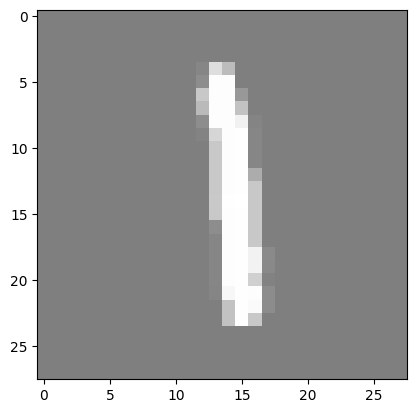

Predicted: 1, Actual: 1


In [14]:
# Sample inference
image, label = test_dataset[np.random.randint(0, len(test_dataset))]
image = image.reshape(-1, 28 * 28).to(device)
output = model(image)
_, predicted = torch.max(output, 1)
# show image
imshow(torchvision.utils.make_grid(image.cpu().reshape(1, 1, 28, 28)))
print(f"Predicted: {predicted.item()}, Actual: {label}")